In [3]:
import numpy as np
import pandas as pd
import pyodbc

In [43]:


# Configuración de la conexión a la base de datos SQL Server
server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'  # Asegúrate de tener el controlador correcto instalado


# Establecer la cadena de conexión a la base de datos
conn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establecer la conexión con la base de datos
conn = pyodbc.connect(conn_str)

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Nombre de la tabla en la base de datos donde se importará el archivo de Excel
table_name = 'Train'

# Eliminar la tabla si ya existe (opcional)
query = f"SELECT * FROM  {table_name}"

df = pd.read_sql(query, conn)
conn.close()

#print("¡Archivo de Excel importado correctamente en la base de datos!")


C:\Users\jcalabozo\AppData\Local\Temp\ipykernel_4368\3372889995.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   NumeroDeAfiliado                 304337 non-null  int64 
 1   Secuencia                        304337 non-null  object
 2   CodigoDeSucursal                 304337 non-null  object
 3   ApellidoAfiliado                 304337 non-null  object
 4   AnioIndicador                    304337 non-null  int64 
 5   MesIndicador                     304337 non-null  object
 6   TipoAfiliacion                   304337 non-null  object
 7   DescripcionDeSexo                303647 non-null  object
 8   EstadoMesIndicadores             304337 non-null  object
 9   Convenio                         304337 non-null  object
 10  DescripcionDeTipoDePago          304314 non-null  object
 11  DescripcionDeInstitucionDeCobro  294823 non-null  object
 12  UsoServicioAlgun

In [45]:
#Completa valores nulos

df['DescripcionDeTipoDePago']=df['DescripcionDeTipoDePago'].fillna('N/A')
df['DescripcionDeInstitucionDeCobro']=df['DescripcionDeInstitucionDeCobro'].fillna('N/A')
df['DescripcionDeSexo']=df['DescripcionDeSexo'].fillna('Indefinido')


In [46]:
# retrieve all labels and store in a list
columnas = df.columns.tolist()

# iterate over the list to print all unique values of each column in the dataframe
for i in columnas:
    print(i,':',df[i].unique())

NumeroDeAfiliado : [680824 680836 680842 ... 549787 658802 658679]
Secuencia : ['1' '0' '3' '2' '5' '4' '6' '7' '38' '9' '8' '10' '11' '14' '15' '17'
 '12' '25' '16' '13' '20' '35' '32' '24' '18' '30' '23' '33' '19' '22'
 '34' '21' '28' '29' '31' '40' '41' '42' '36' '26' '44' '39' '27' '43'
 '37' '46' '45']
CodigoDeSucursal : ['2' '1']
ApellidoAfiliado : ['LENCINAS                      ' 'PRATO                         '
 'VAZQUEZ                       ' ... 'PARROTTI                      '
 'BUASSO                        ' 'VEGA CASAJENAS                ']
AnioIndicador : [2021 2009 2011 2017 2018 2010 2019 2008 2016 2012 2015 2020 2014 2013
 2007 2006]
MesIndicador : ['4' '9' '1' '6' '5' '11' '12' '8' '10' '3' '7' '2']
TipoAfiliacion : ['Voluntario' 'Individual']
DescripcionDeSexo : ['Femenino' 'Masculino' 'Indefinido']
EstadoMesIndicadores : ['Activo' 'Suspendido']
Convenio : ['SUOEM' 'UEPC' 'SinConvenio' 'AMR MUTUAL AFILIADOS'
 'OBRA SOCIAL UNR - ACTIVOS' 'IPAM SIN COSEGURO' 'IPAM R

In [47]:
#Se eliminan columnas no relevantes

df=df.drop(columns=['NumeroDeAfiliado', 'ApellidoAfiliado'])

In [48]:
df['Secuencia']=df['Secuencia'].astype('Float64')
df['MesIndicador']=df['MesIndicador'].astype('Float64')
df['CantidadPersonasPagan']=df['CantidadPersonasPagan'].astype('Float64')


In [49]:
df[df.select_dtypes(include=np.number).columns]=df[df.select_dtypes(include=np.number).columns].astype('Float64')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Secuencia                        304337 non-null  Float64
 1   CodigoDeSucursal                 304337 non-null  object 
 2   AnioIndicador                    304337 non-null  Float64
 3   MesIndicador                     304337 non-null  Float64
 4   TipoAfiliacion                   304337 non-null  object 
 5   DescripcionDeSexo                304337 non-null  object 
 6   EstadoMesIndicadores             304337 non-null  object 
 7   Convenio                         304337 non-null  object 
 8   DescripcionDeTipoDePago          304337 non-null  object 
 9   DescripcionDeInstitucionDeCobro  304337 non-null  object 
 10  UsoServicioAlgunaVez             304337 non-null  object 
 11  ConAtencionAnulada               304337 non-null  object 
 12  Ed

In [51]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Secuencia,304337.0,1.485304,1.828241,0.0,0.0,1.0,2.0,46.0
AnioIndicador,304337.0,2016.773928,4.476828,2006.0,2013.0,2018.0,2021.0,2021.0
MesIndicador,304337.0,5.563809,3.002197,1.0,4.0,4.0,8.0,12.0
Edad,304337.0,41.717484,32.907264,0.0,20.0,39.0,60.0,300.0
QIntegrantes,304337.0,3.587273,2.130944,1.0,2.0,3.0,5.0,27.0
QAttAUTOIndividuo,304337.0,4.767422,9.564825,0.0,0.0,1.0,5.0,517.0
QAttCriticasIndividuo,304337.0,0.70141,2.753228,0.0,0.0,0.0,0.0,473.0
QAttOtrosIndividuo,304337.0,0.000273,0.016512,0.0,0.0,0.0,0.0,1.0
CantidadPersonasPagan,304337.0,0.344963,0.47642,0.0,0.0,0.0,1.0,2.0
CantidadPeriodos,304337.0,966.684383,2915.939467,0.0,0.0,0.0,4.0,9999.0


In [52]:
# list of numerical features
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Secuencia', 'AnioIndicador', 'MesIndicador', 'Edad', 'QIntegrantes',
       'QAttAUTOIndividuo', 'QAttCriticasIndividuo', 'QAttOtrosIndividuo',
       'CantidadPersonasPagan', 'CantidadPeriodos', 'AntiguedadMeses',
       'AntiguedadSinPromo'],
      dtype='object')

In [53]:
# list of categorical features
cat_cols = df.select_dtypes(include=object).columns
cat_cols = cat_cols.delete(4)



In [54]:
cat_cols

Index(['CodigoDeSucursal', 'TipoAfiliacion', 'DescripcionDeSexo',
       'EstadoMesIndicadores', 'DescripcionDeTipoDePago',
       'DescripcionDeInstitucionDeCobro', 'UsoServicioAlgunaVez',
       'ConAtencionAnulada', 'QAttSeguimientoIndividuo',
       'QAttVirtualesIndividuo', 'ISoloAttBanales', 'ISoloAttCr_ticas',
       'ISinAtenciones', 'IConAttAutoyCriticas', 'ISinExpAuto',
       'ISinExpCriticas', 'GSoloAttBanales', 'GSoloAttCr_ticas',
       'GSinAtenciones', 'GConAttAutoyCriticas', 'GSinExpAuto',
       'GSinExpCriticas', 'EstadoMora', 'BajaTarget'],
      dtype='object')

In [16]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import math

# Univariate visualization of categorical features
def categorical_feature_func(cat_cols, data, plot_columnas):
     
     plot_filas = math.ceil(len(cat_cols)/plot_columnas)
     fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
     
     for index, col in enumerate(cat_cols):
          axs_fila=index // plot_columnas
          axs_col=index % plot_columnas
          sns.countplot( x=col,data=data, ax = axs[axs_fila][axs_col])
          ax=axs[axs_fila][axs_col]
          ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
          ax.tick_params(axis='both', labelsize=20)
          ax.set_xlabel(col, fontsize=20)  
          ax.set_ylabel('Count', fontsize=20)
          



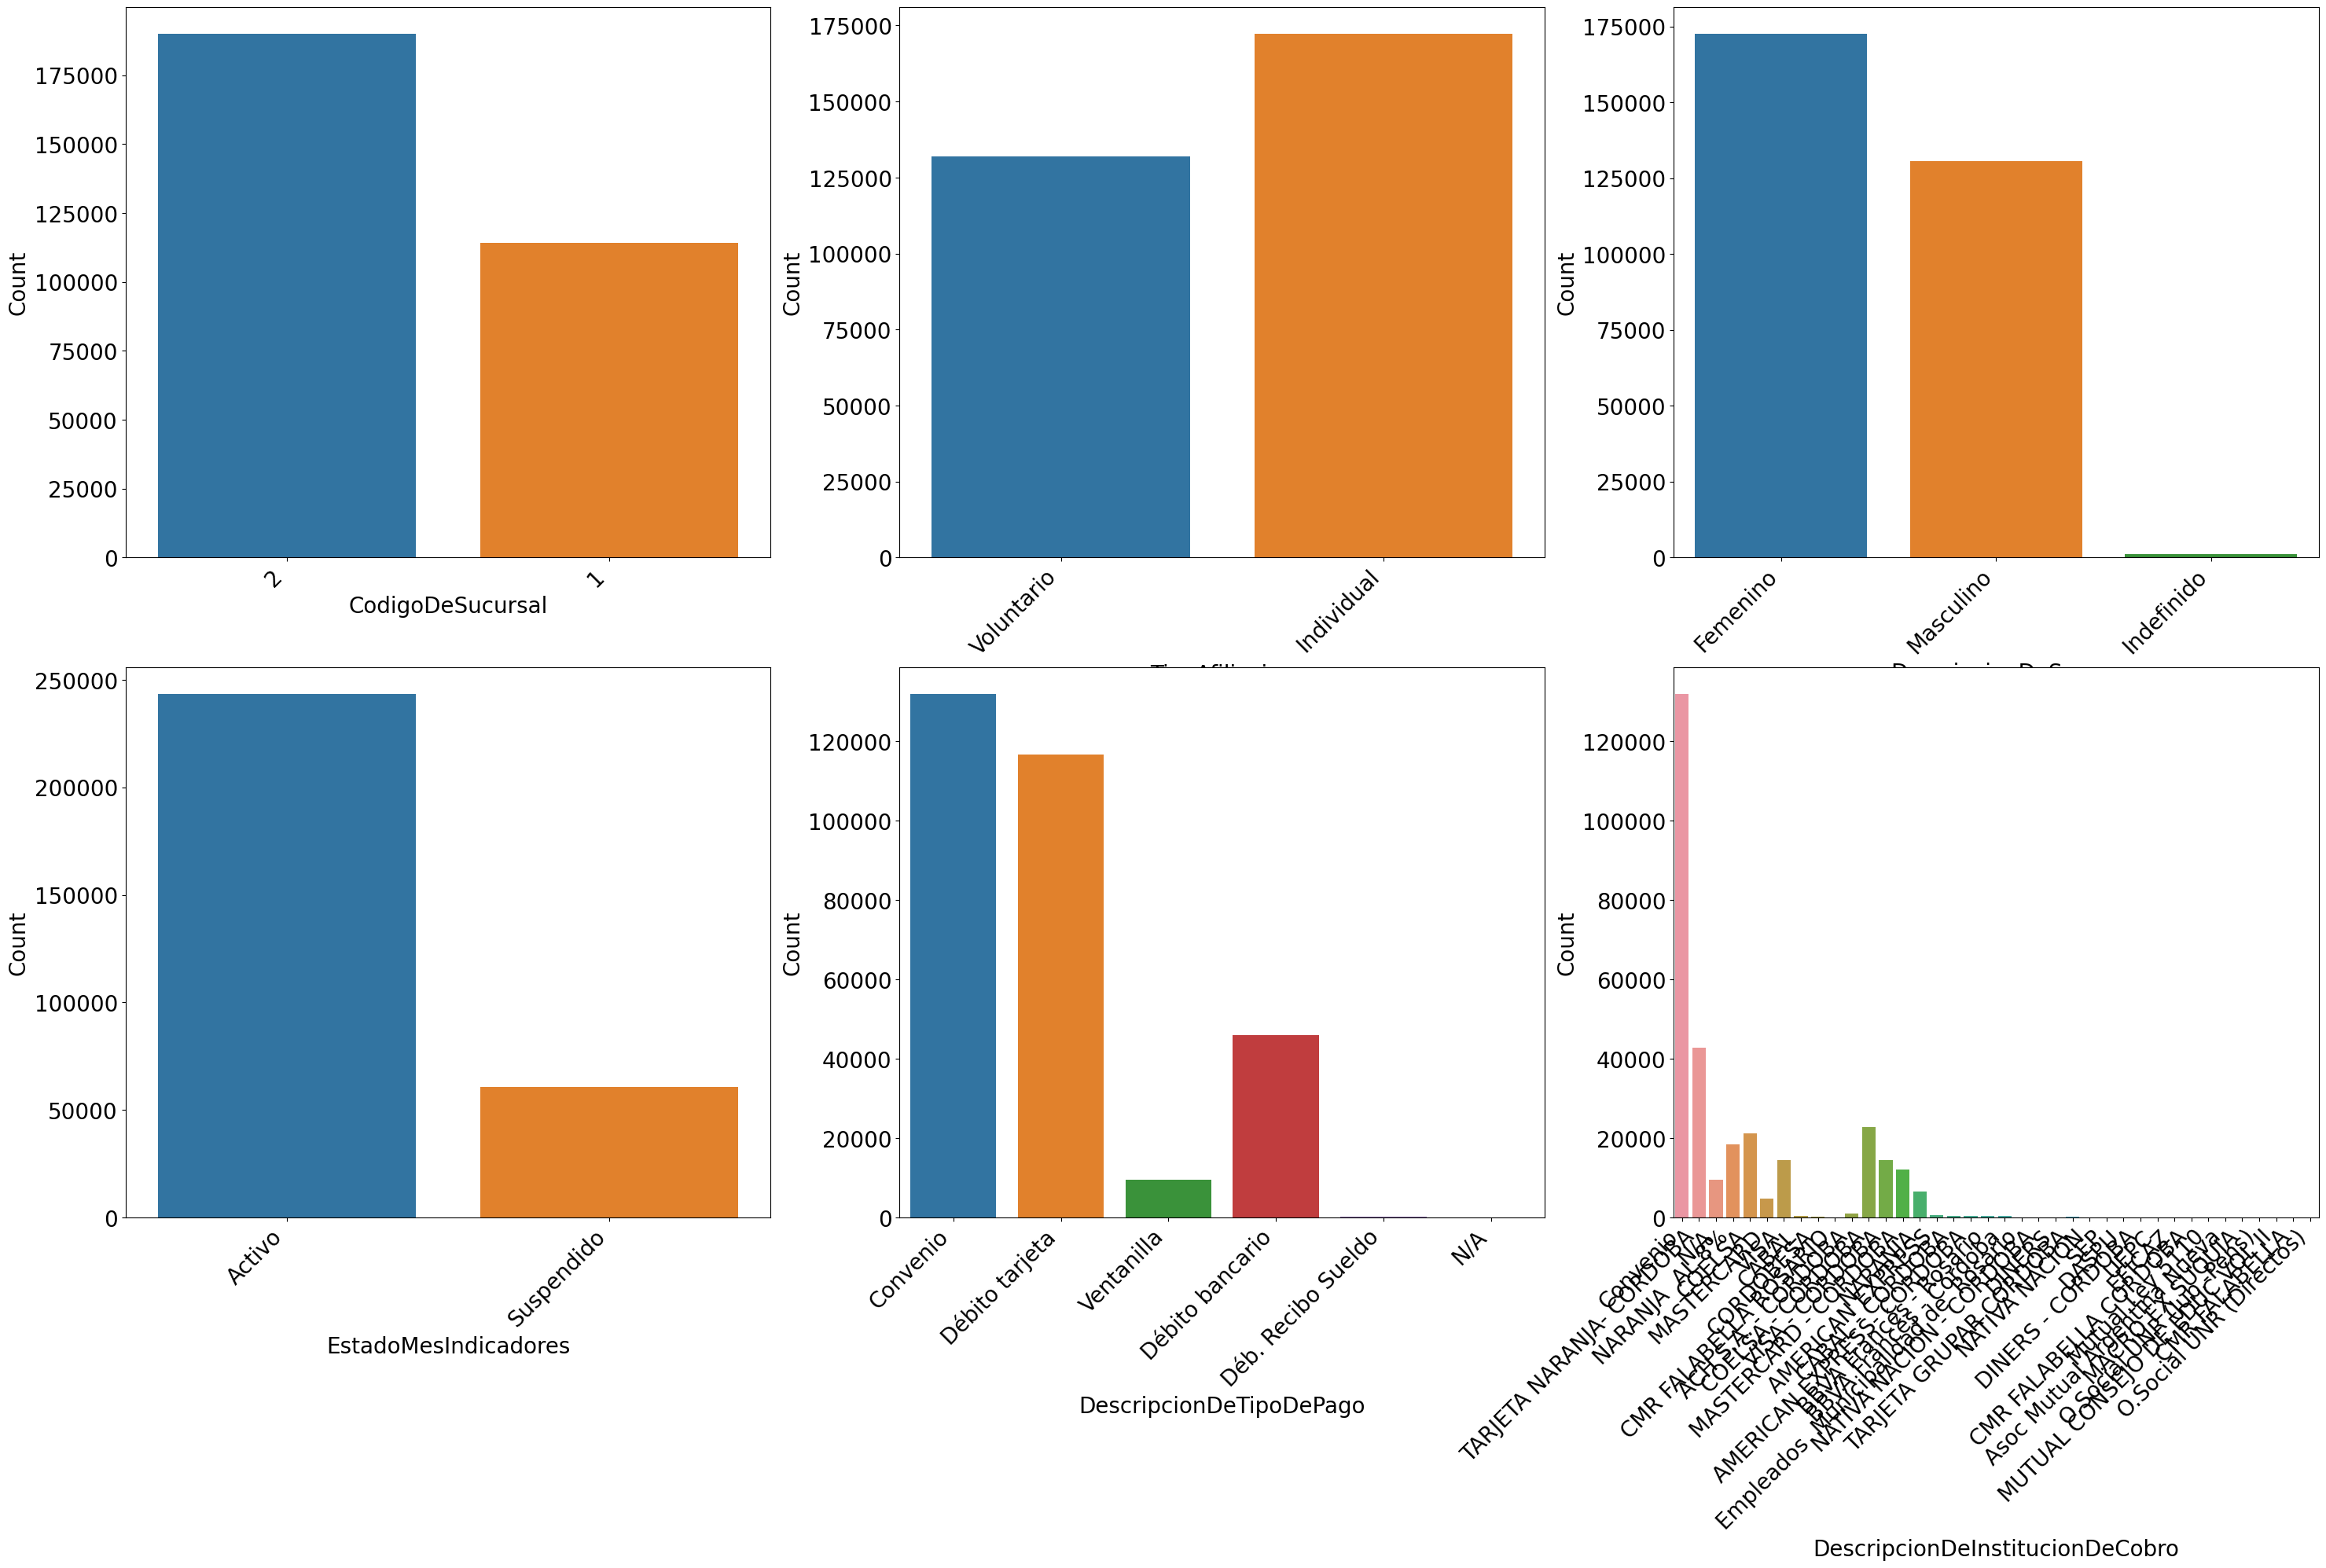

In [17]:
categorical_feature_func(cat_cols[0:6], df, 3)


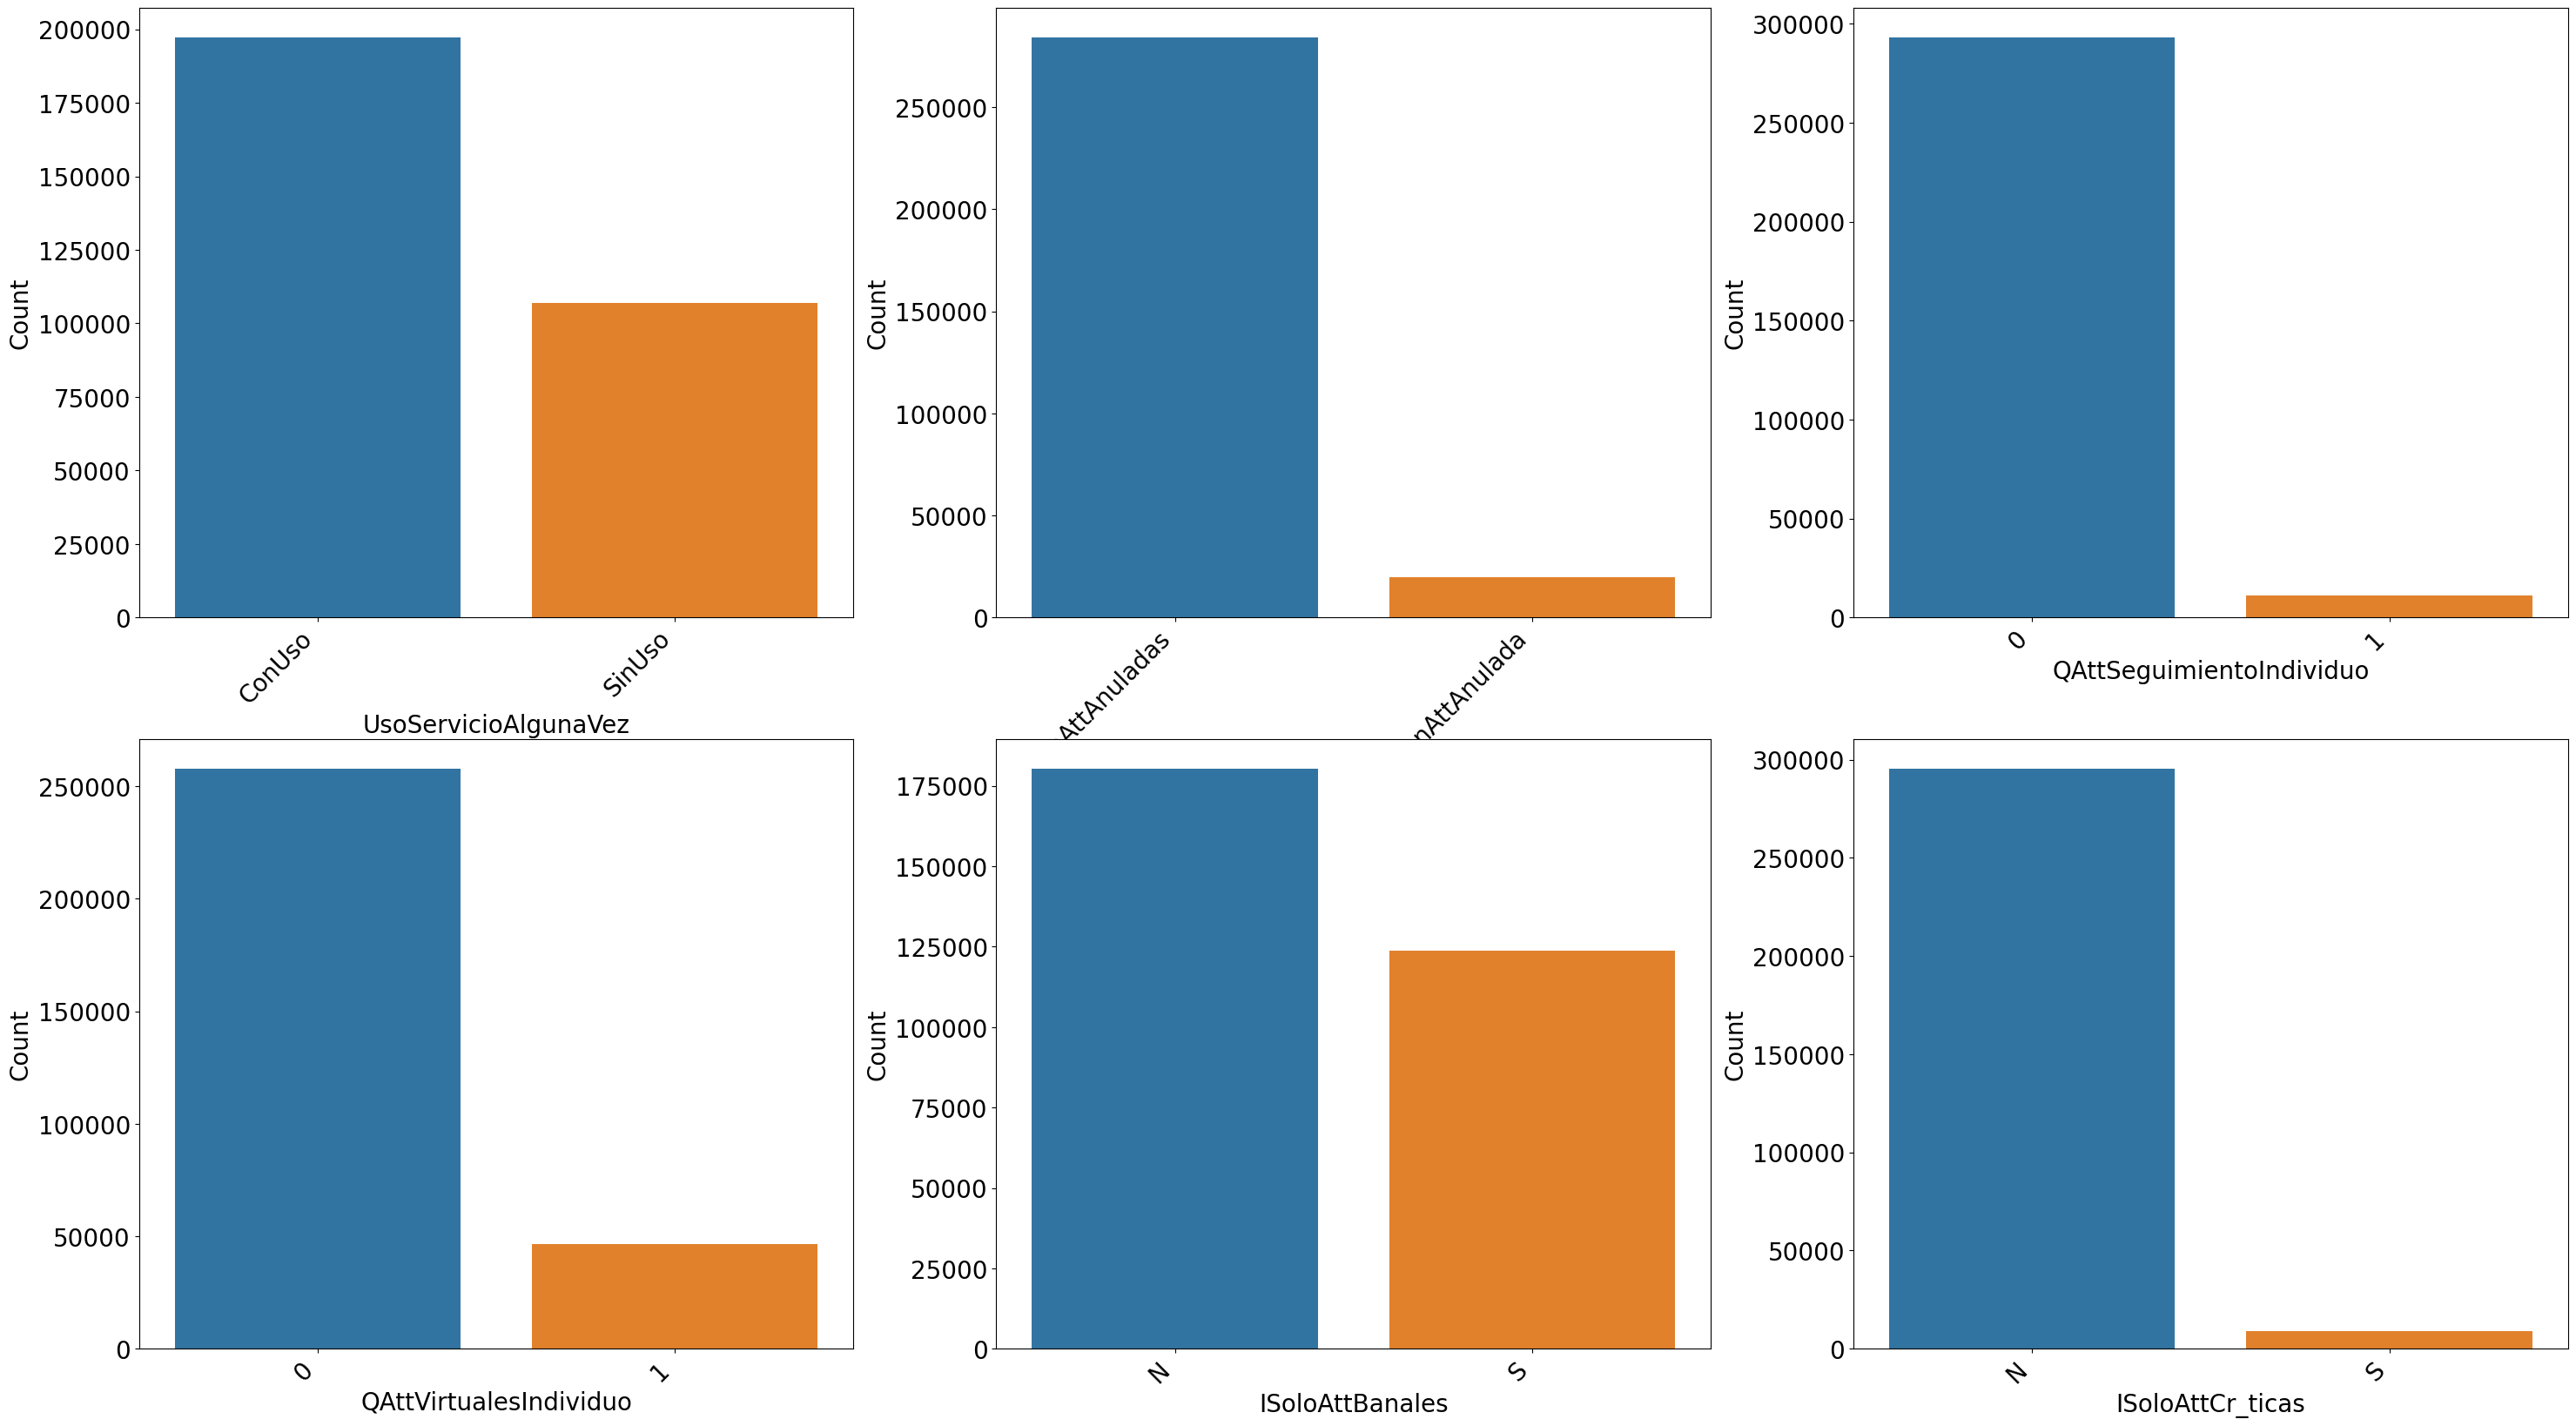

In [18]:
categorical_feature_func(cat_cols[6:12], df, 3)


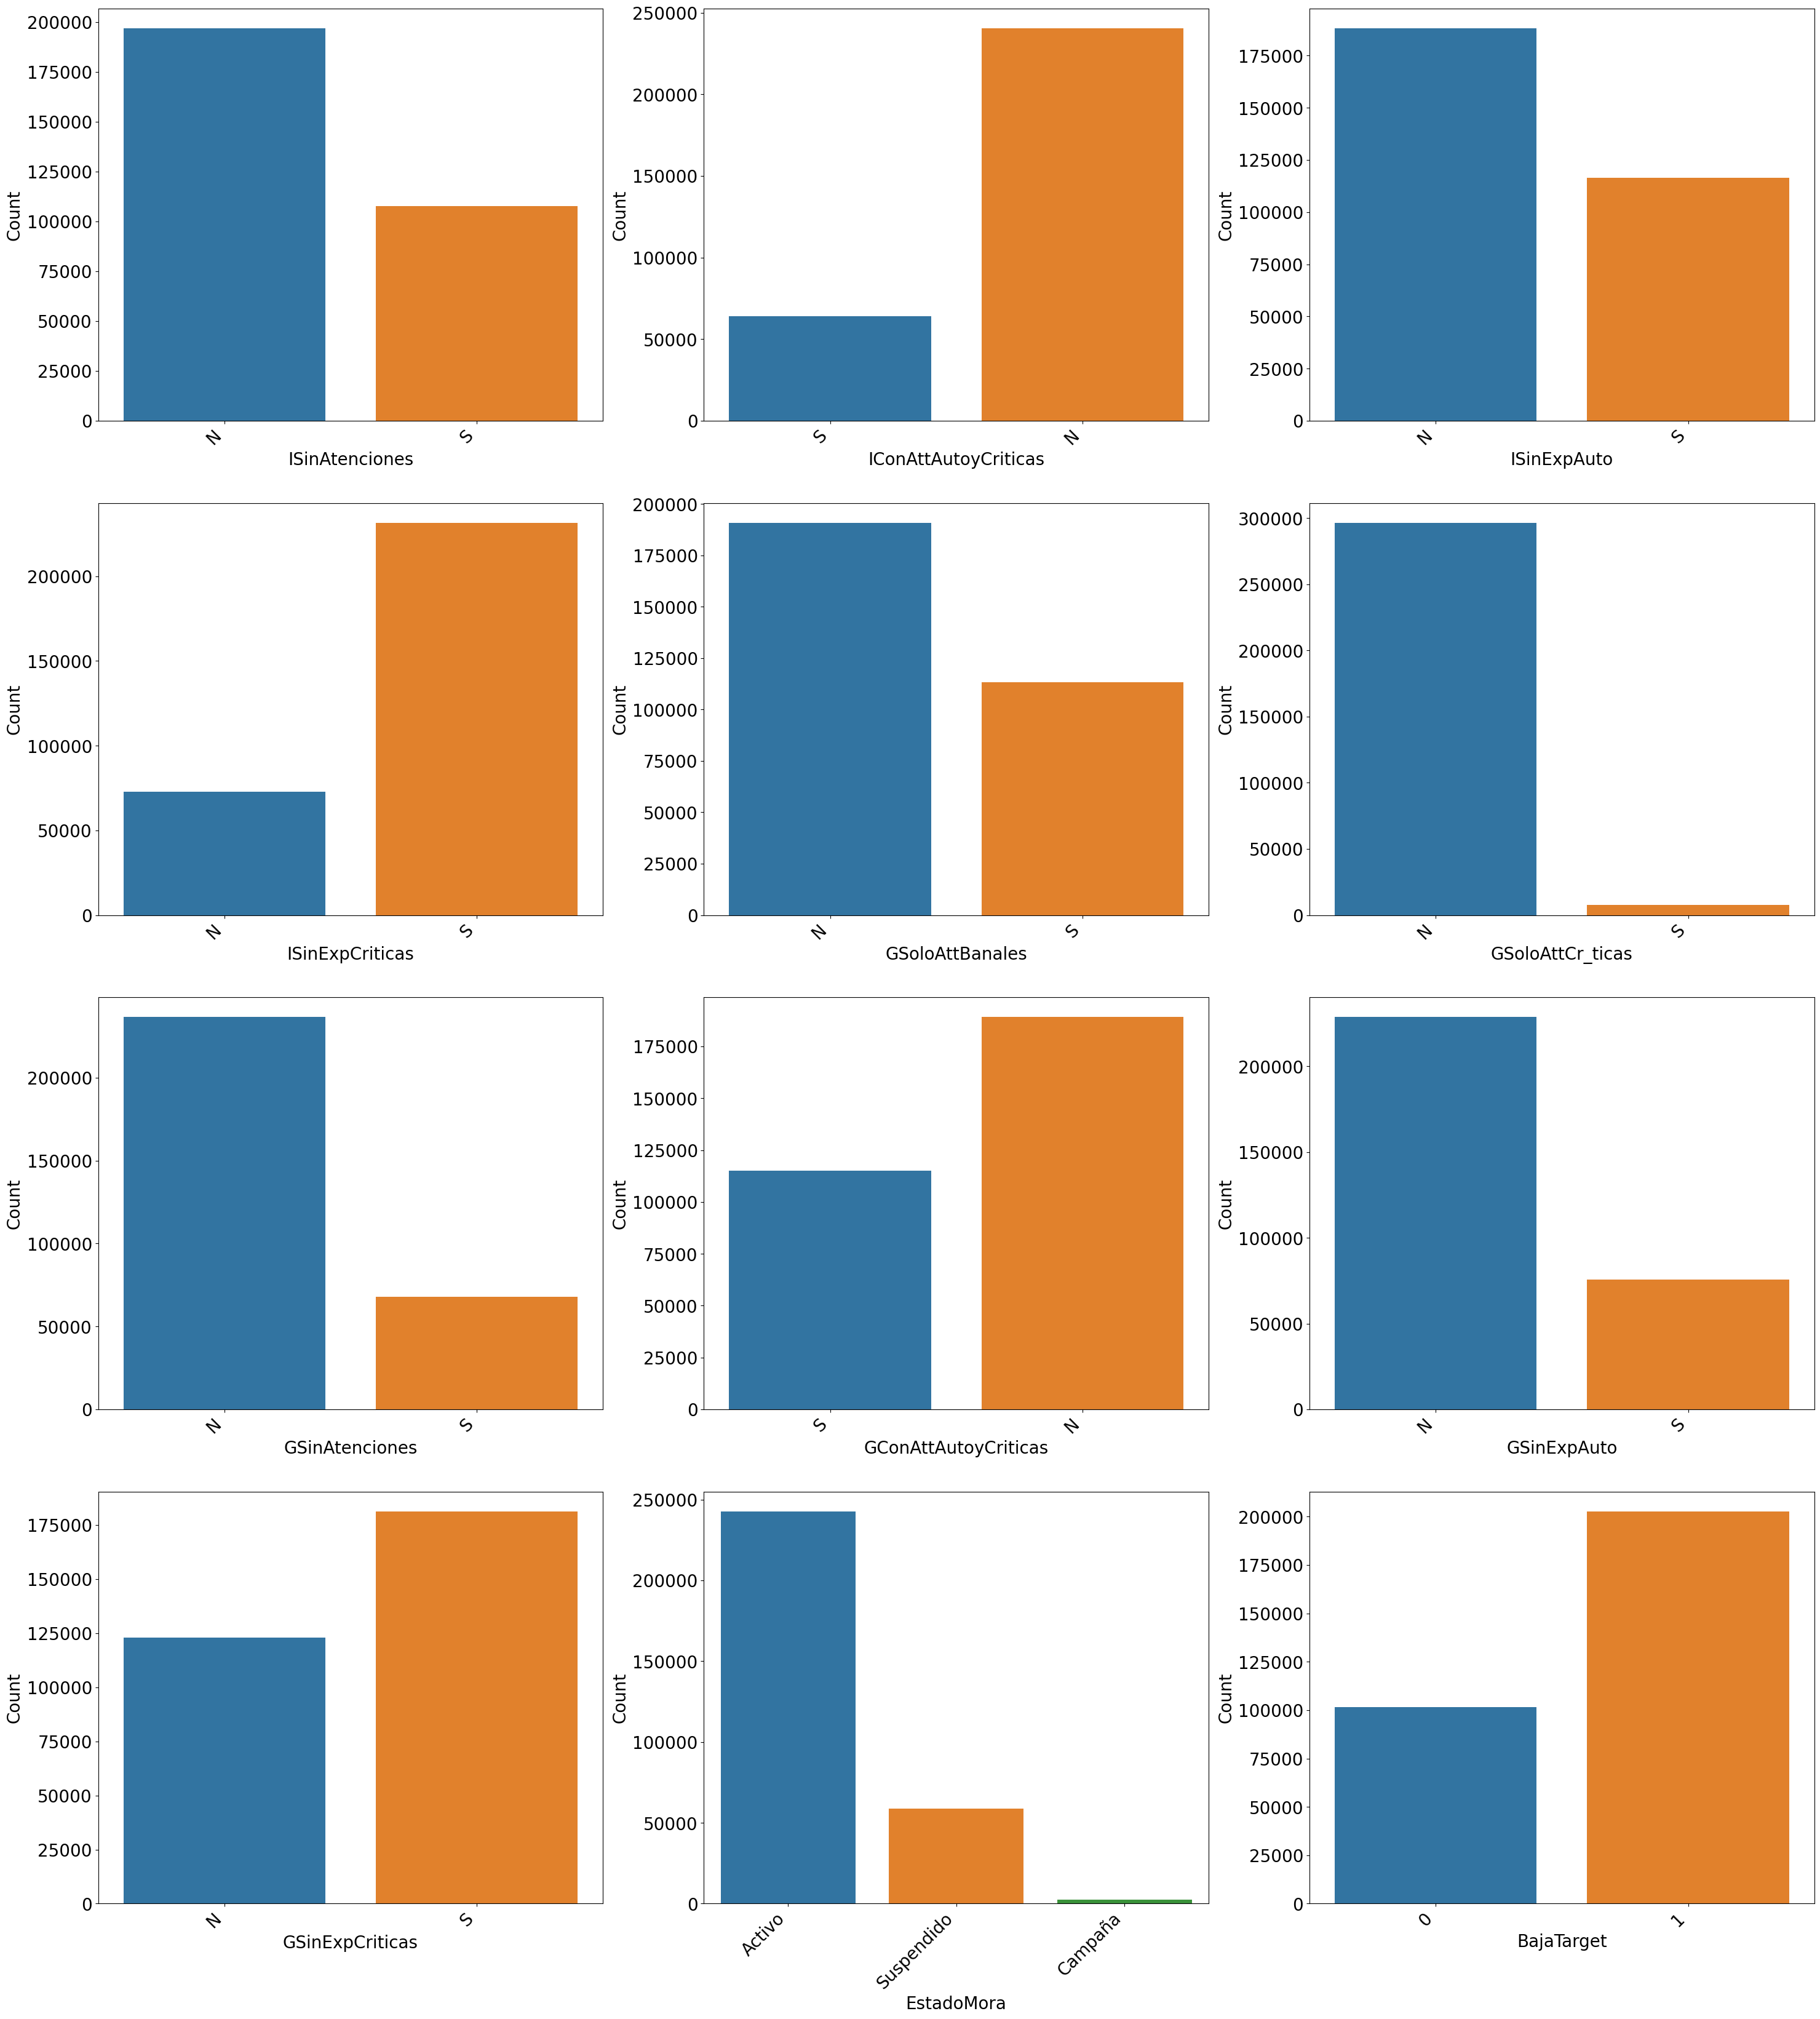

In [19]:
categorical_feature_func(cat_cols[12:], df, 3)


In [20]:
#Visualización bivariada de características categóricas
#relación entre cada variable categórica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def categorical_feature_func(cat_cols, cross_col, data, plot_columnas):

    plot_filas = math.ceil(len(cat_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(cat_cols):
            pd.crosstab(data[col],data[cross_col]).plot(kind="bar", rot=45, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(cat_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            pd.crosstab(data[col],data[cross_col]).plot( kind="bar", rot=45, ax = axs[axs_fila][axs_col])
            #sns.countplot( x=col,hue=cross_col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
           


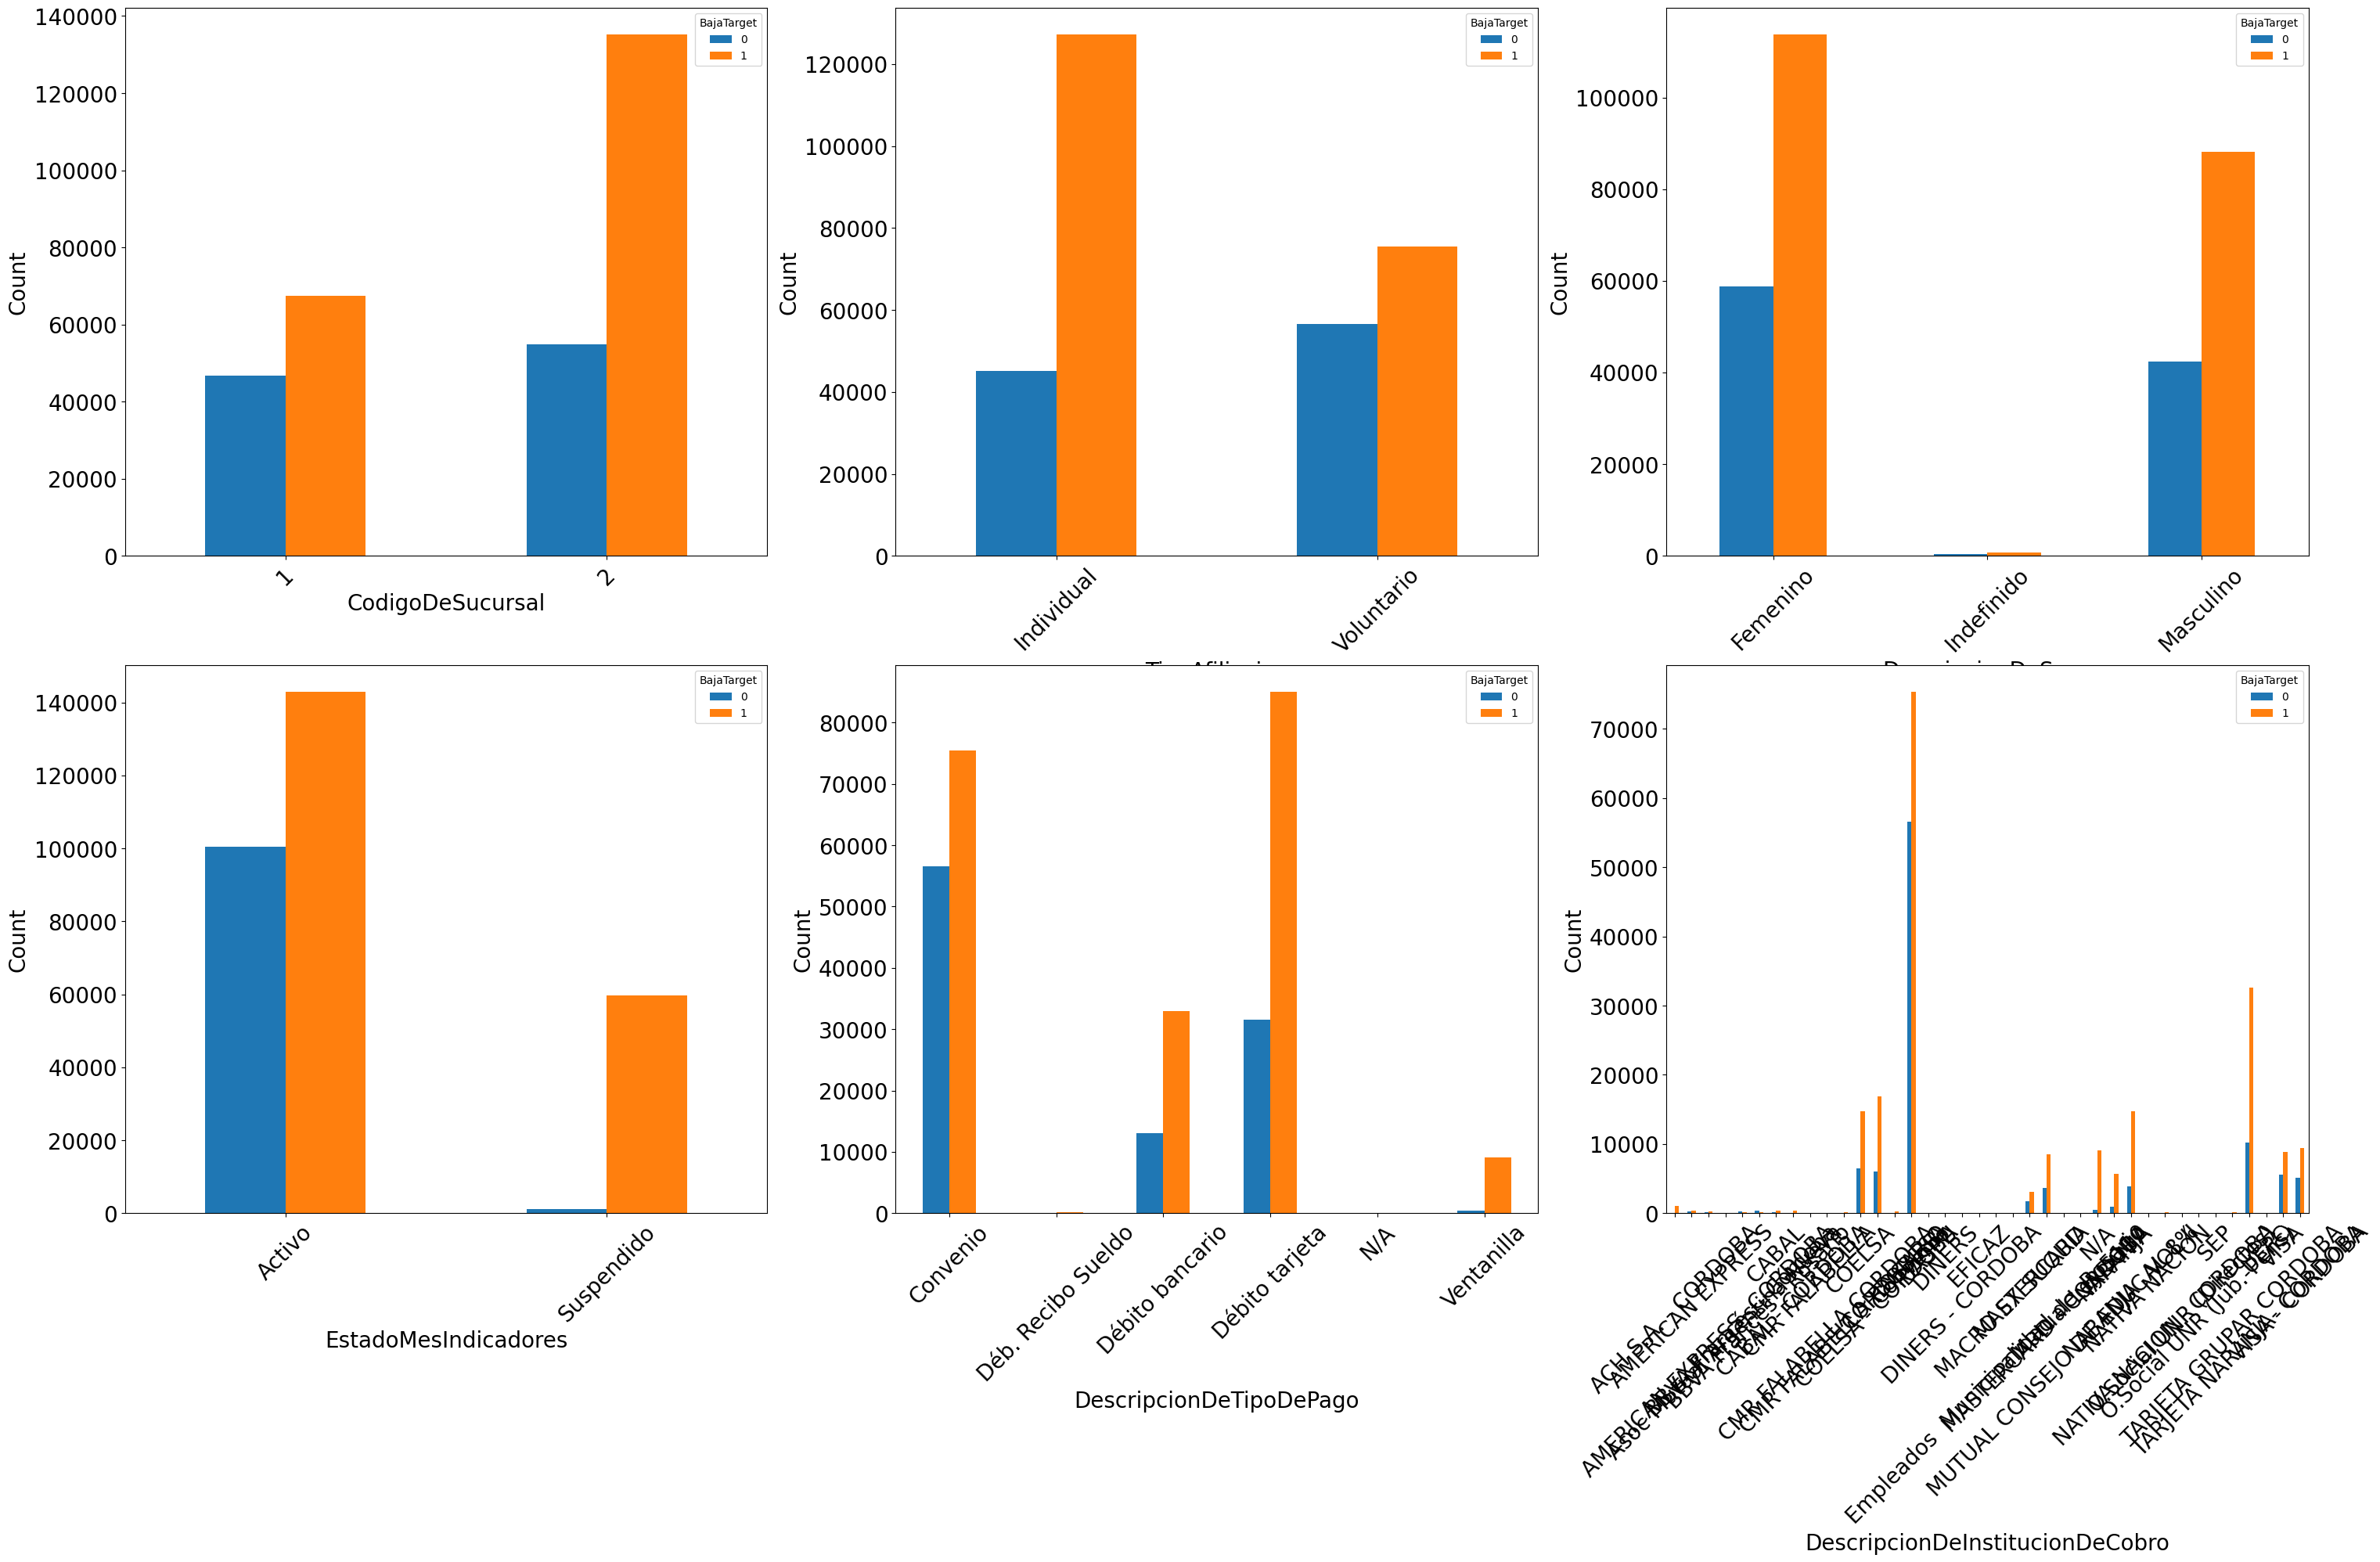

In [21]:
categorical_feature_func(cat_cols[0:6], 'BajaTarget', df, 3)

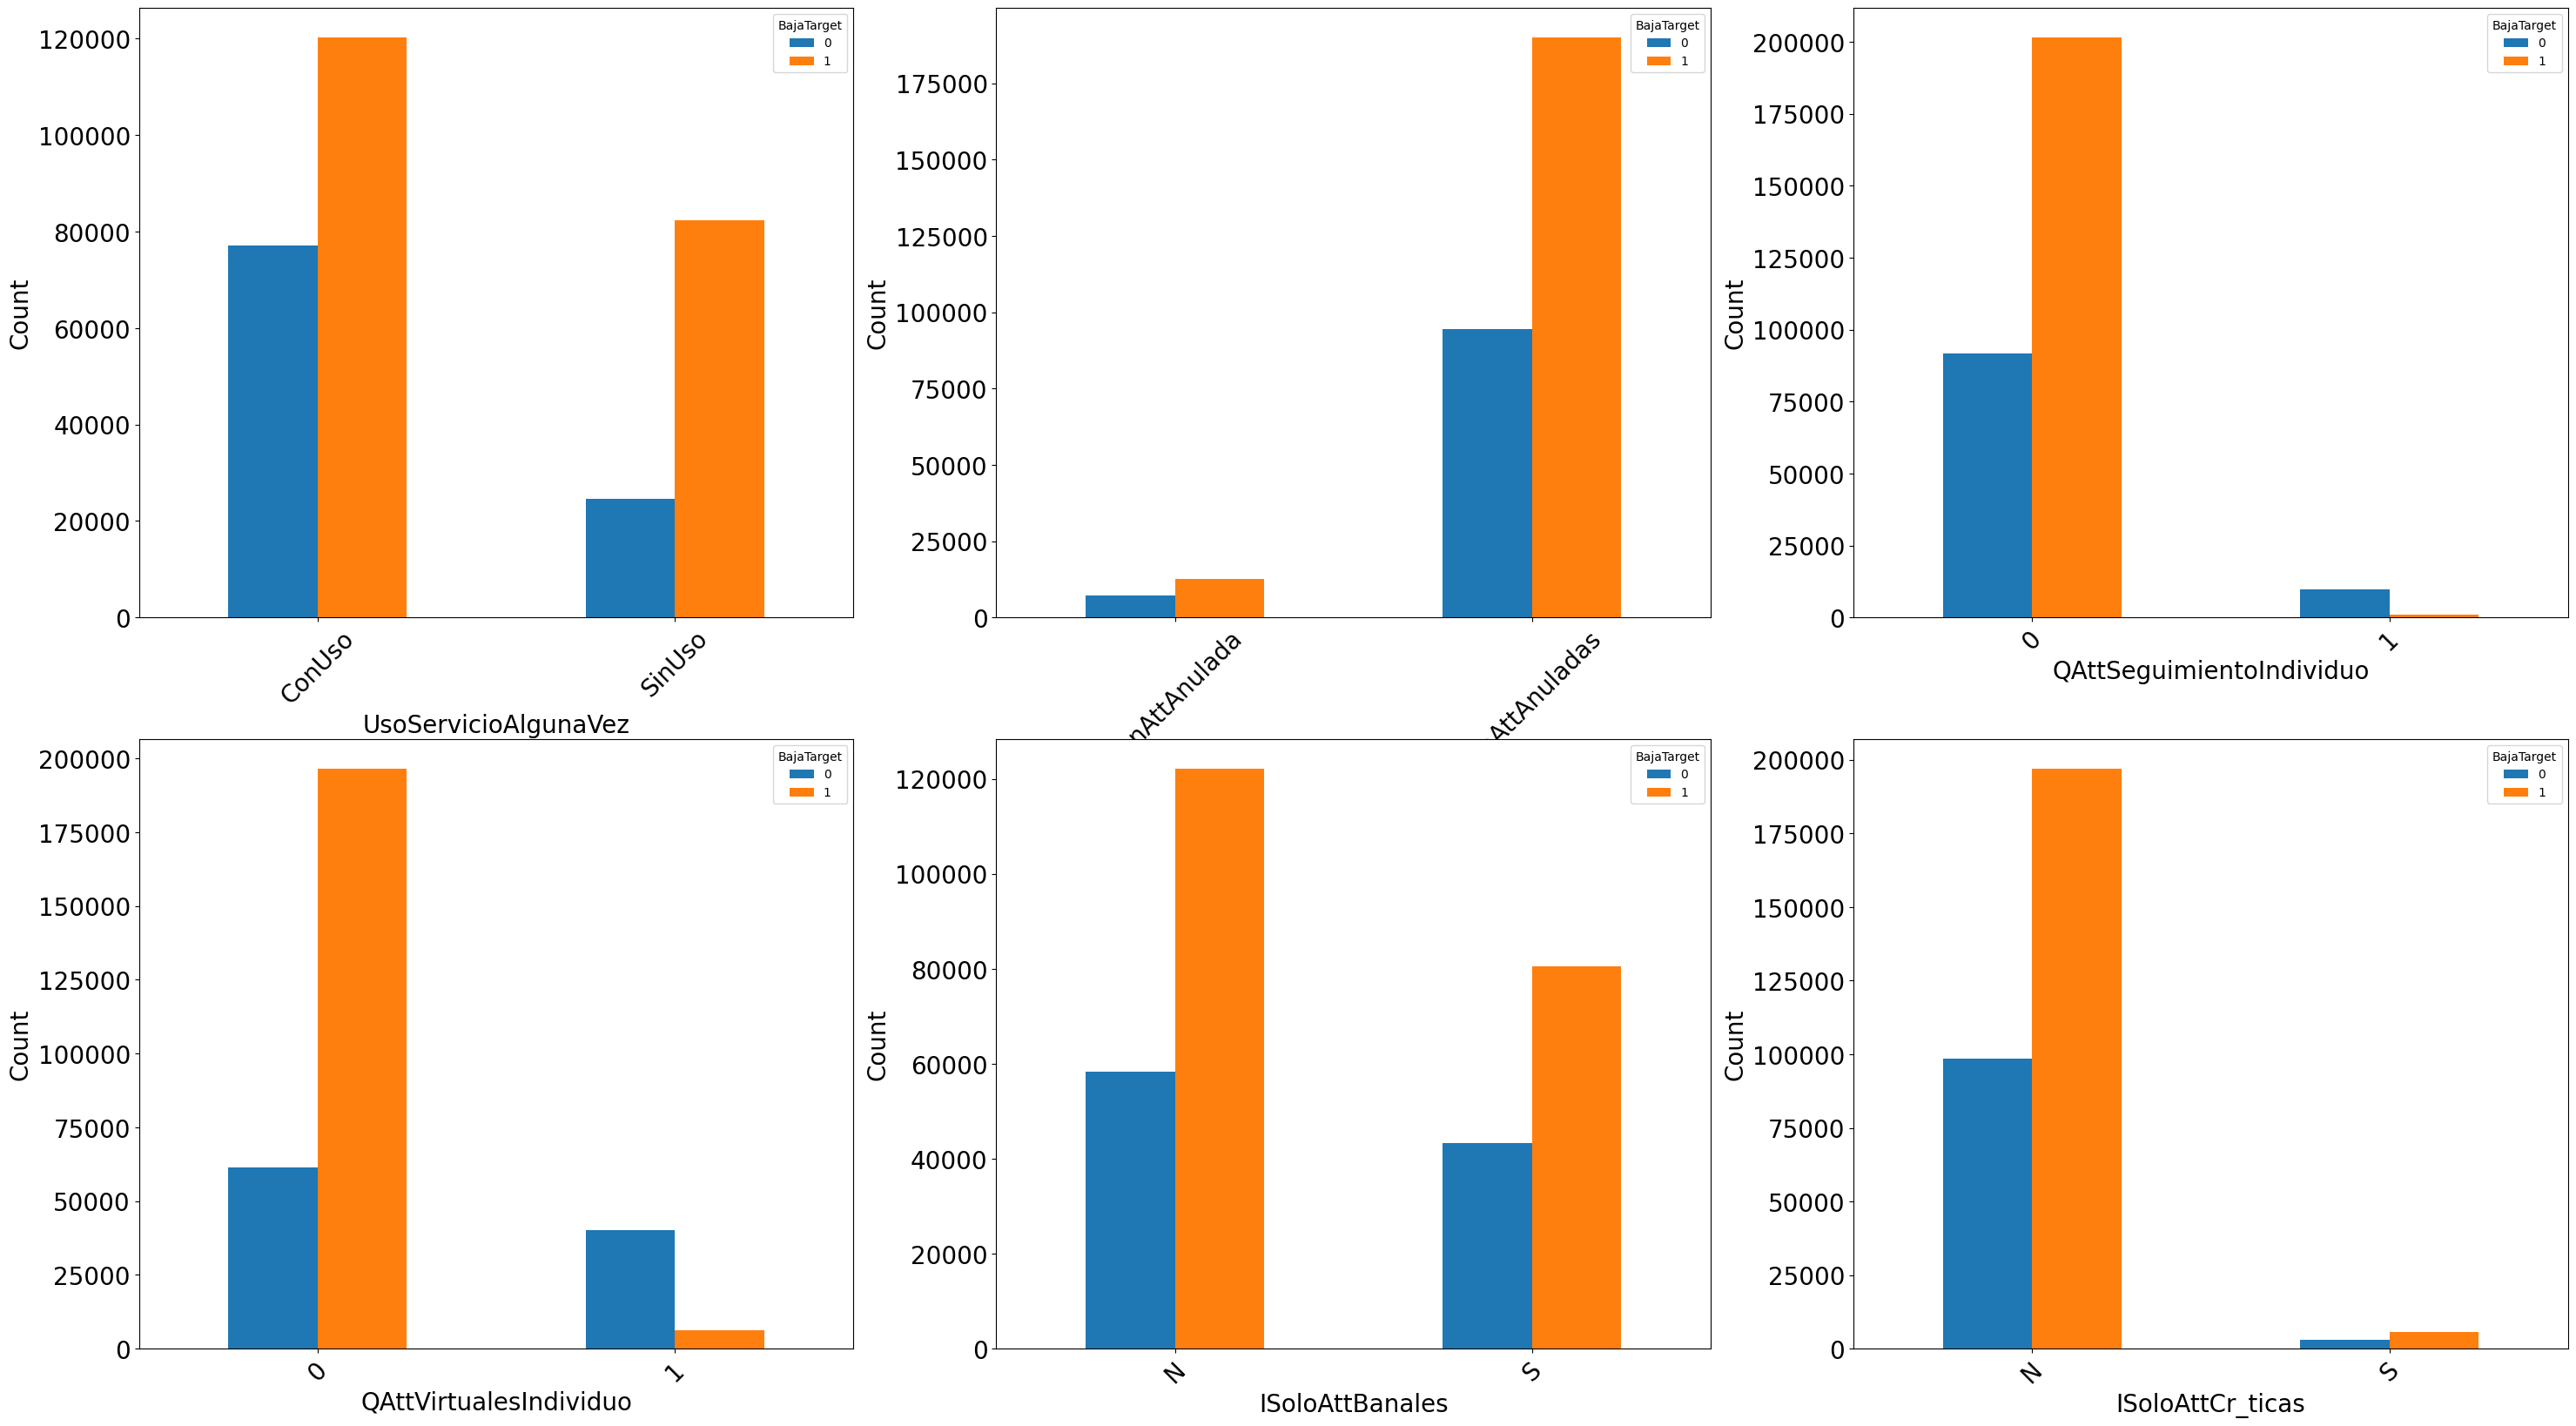

In [22]:
categorical_feature_func(cat_cols[6:12], 'BajaTarget', df, 3)

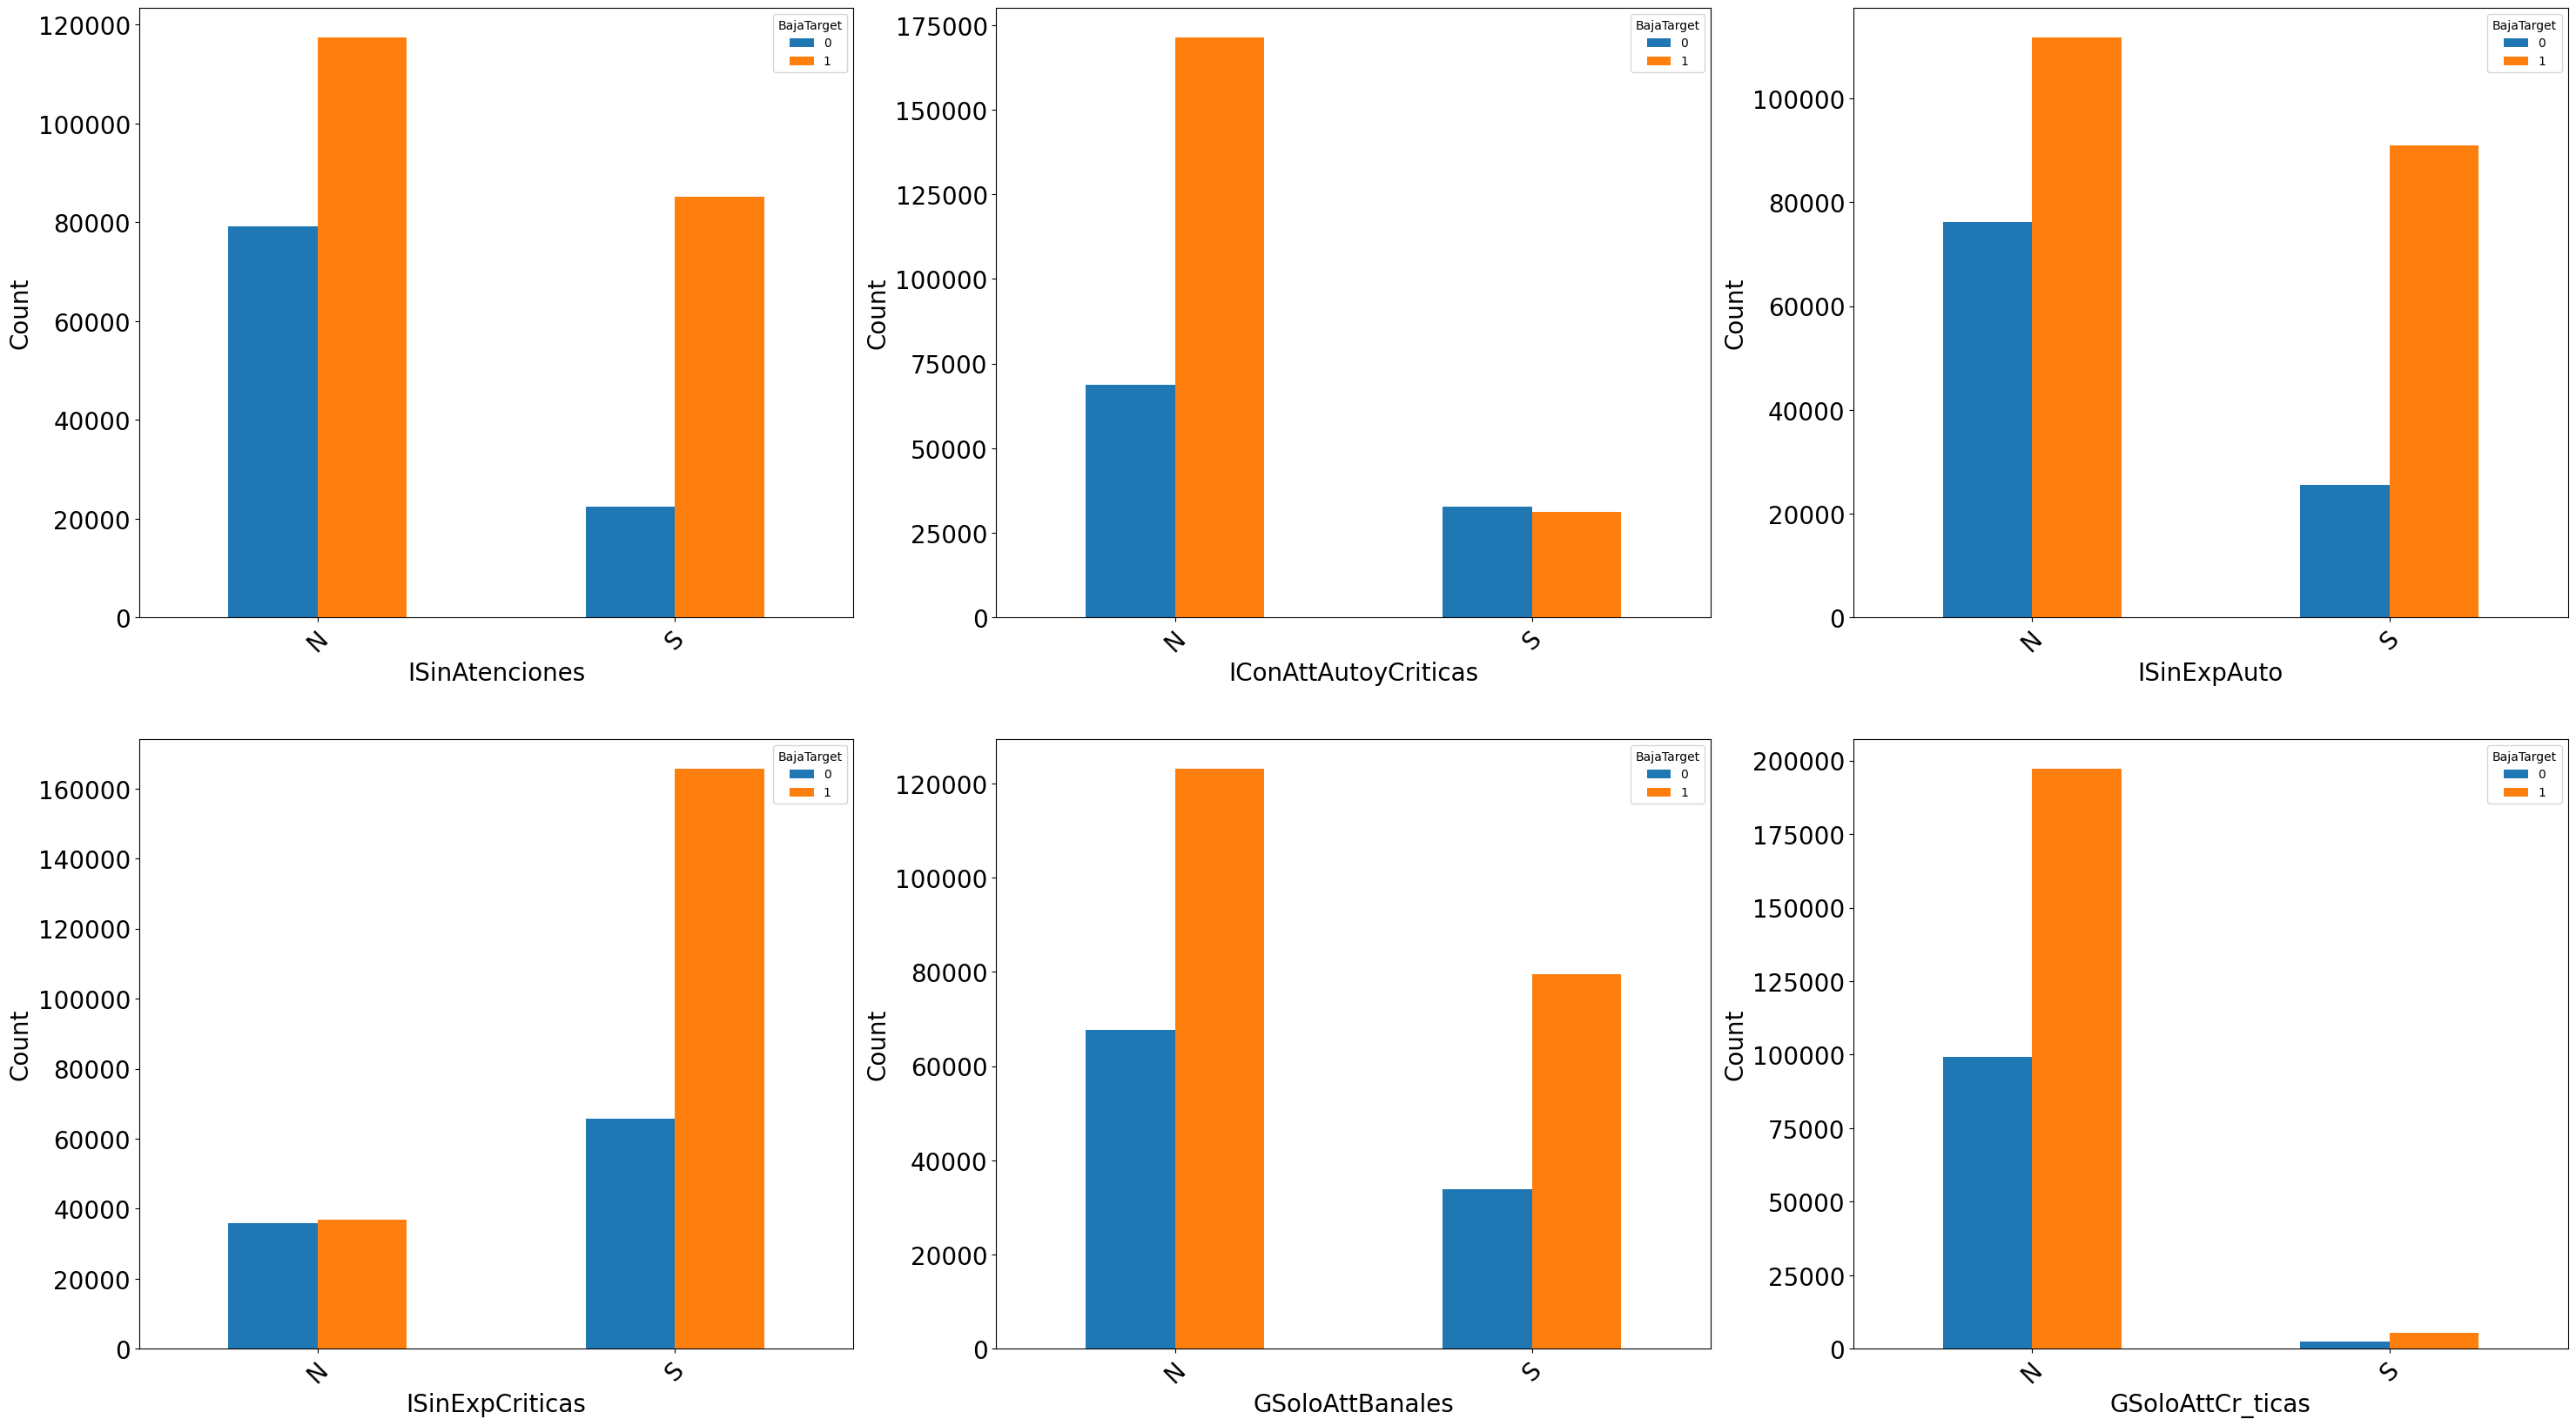

In [23]:
categorical_feature_func(cat_cols[12:18], 'BajaTarget', df, 3)

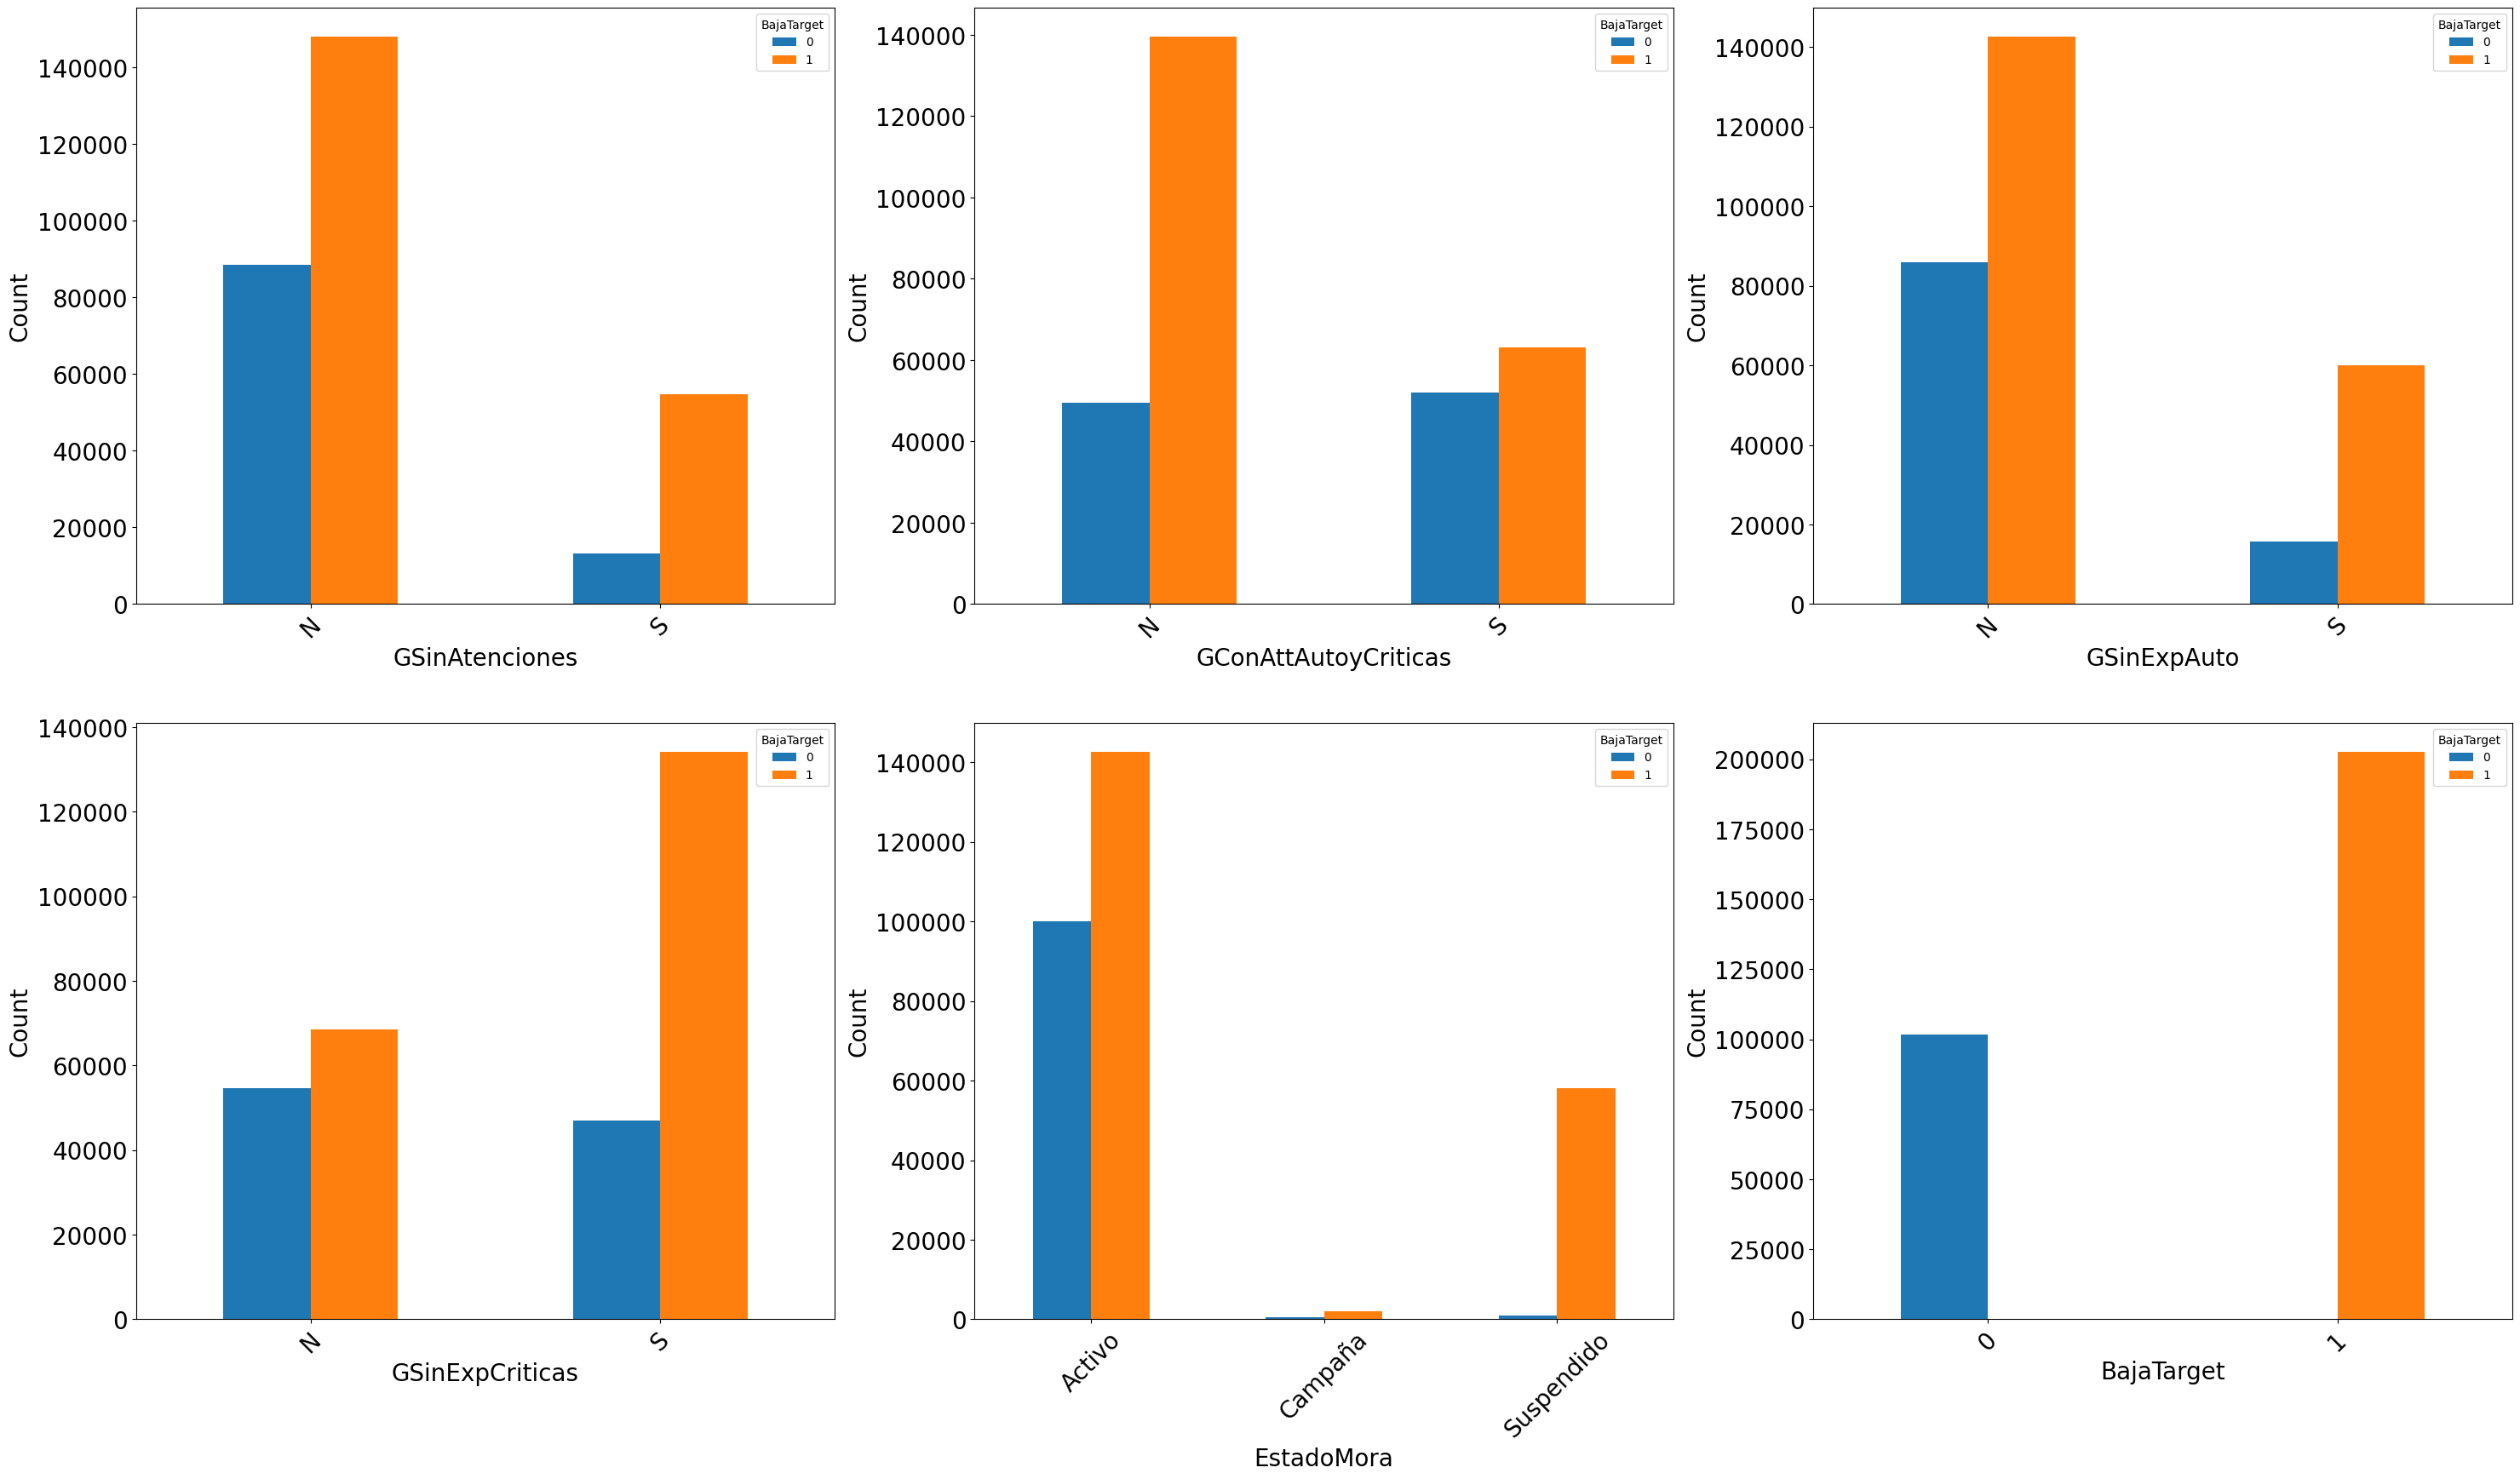

In [24]:
categorical_feature_func(cat_cols[18:], 'BajaTarget', df, 3)

In [25]:
# Univariate visualization of numerical features
def numeric_features_func(num_cols, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.histplot(x=col,data=data, kde=True, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.histplot(x=col,data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    plt.tight_layout()
    

c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constru

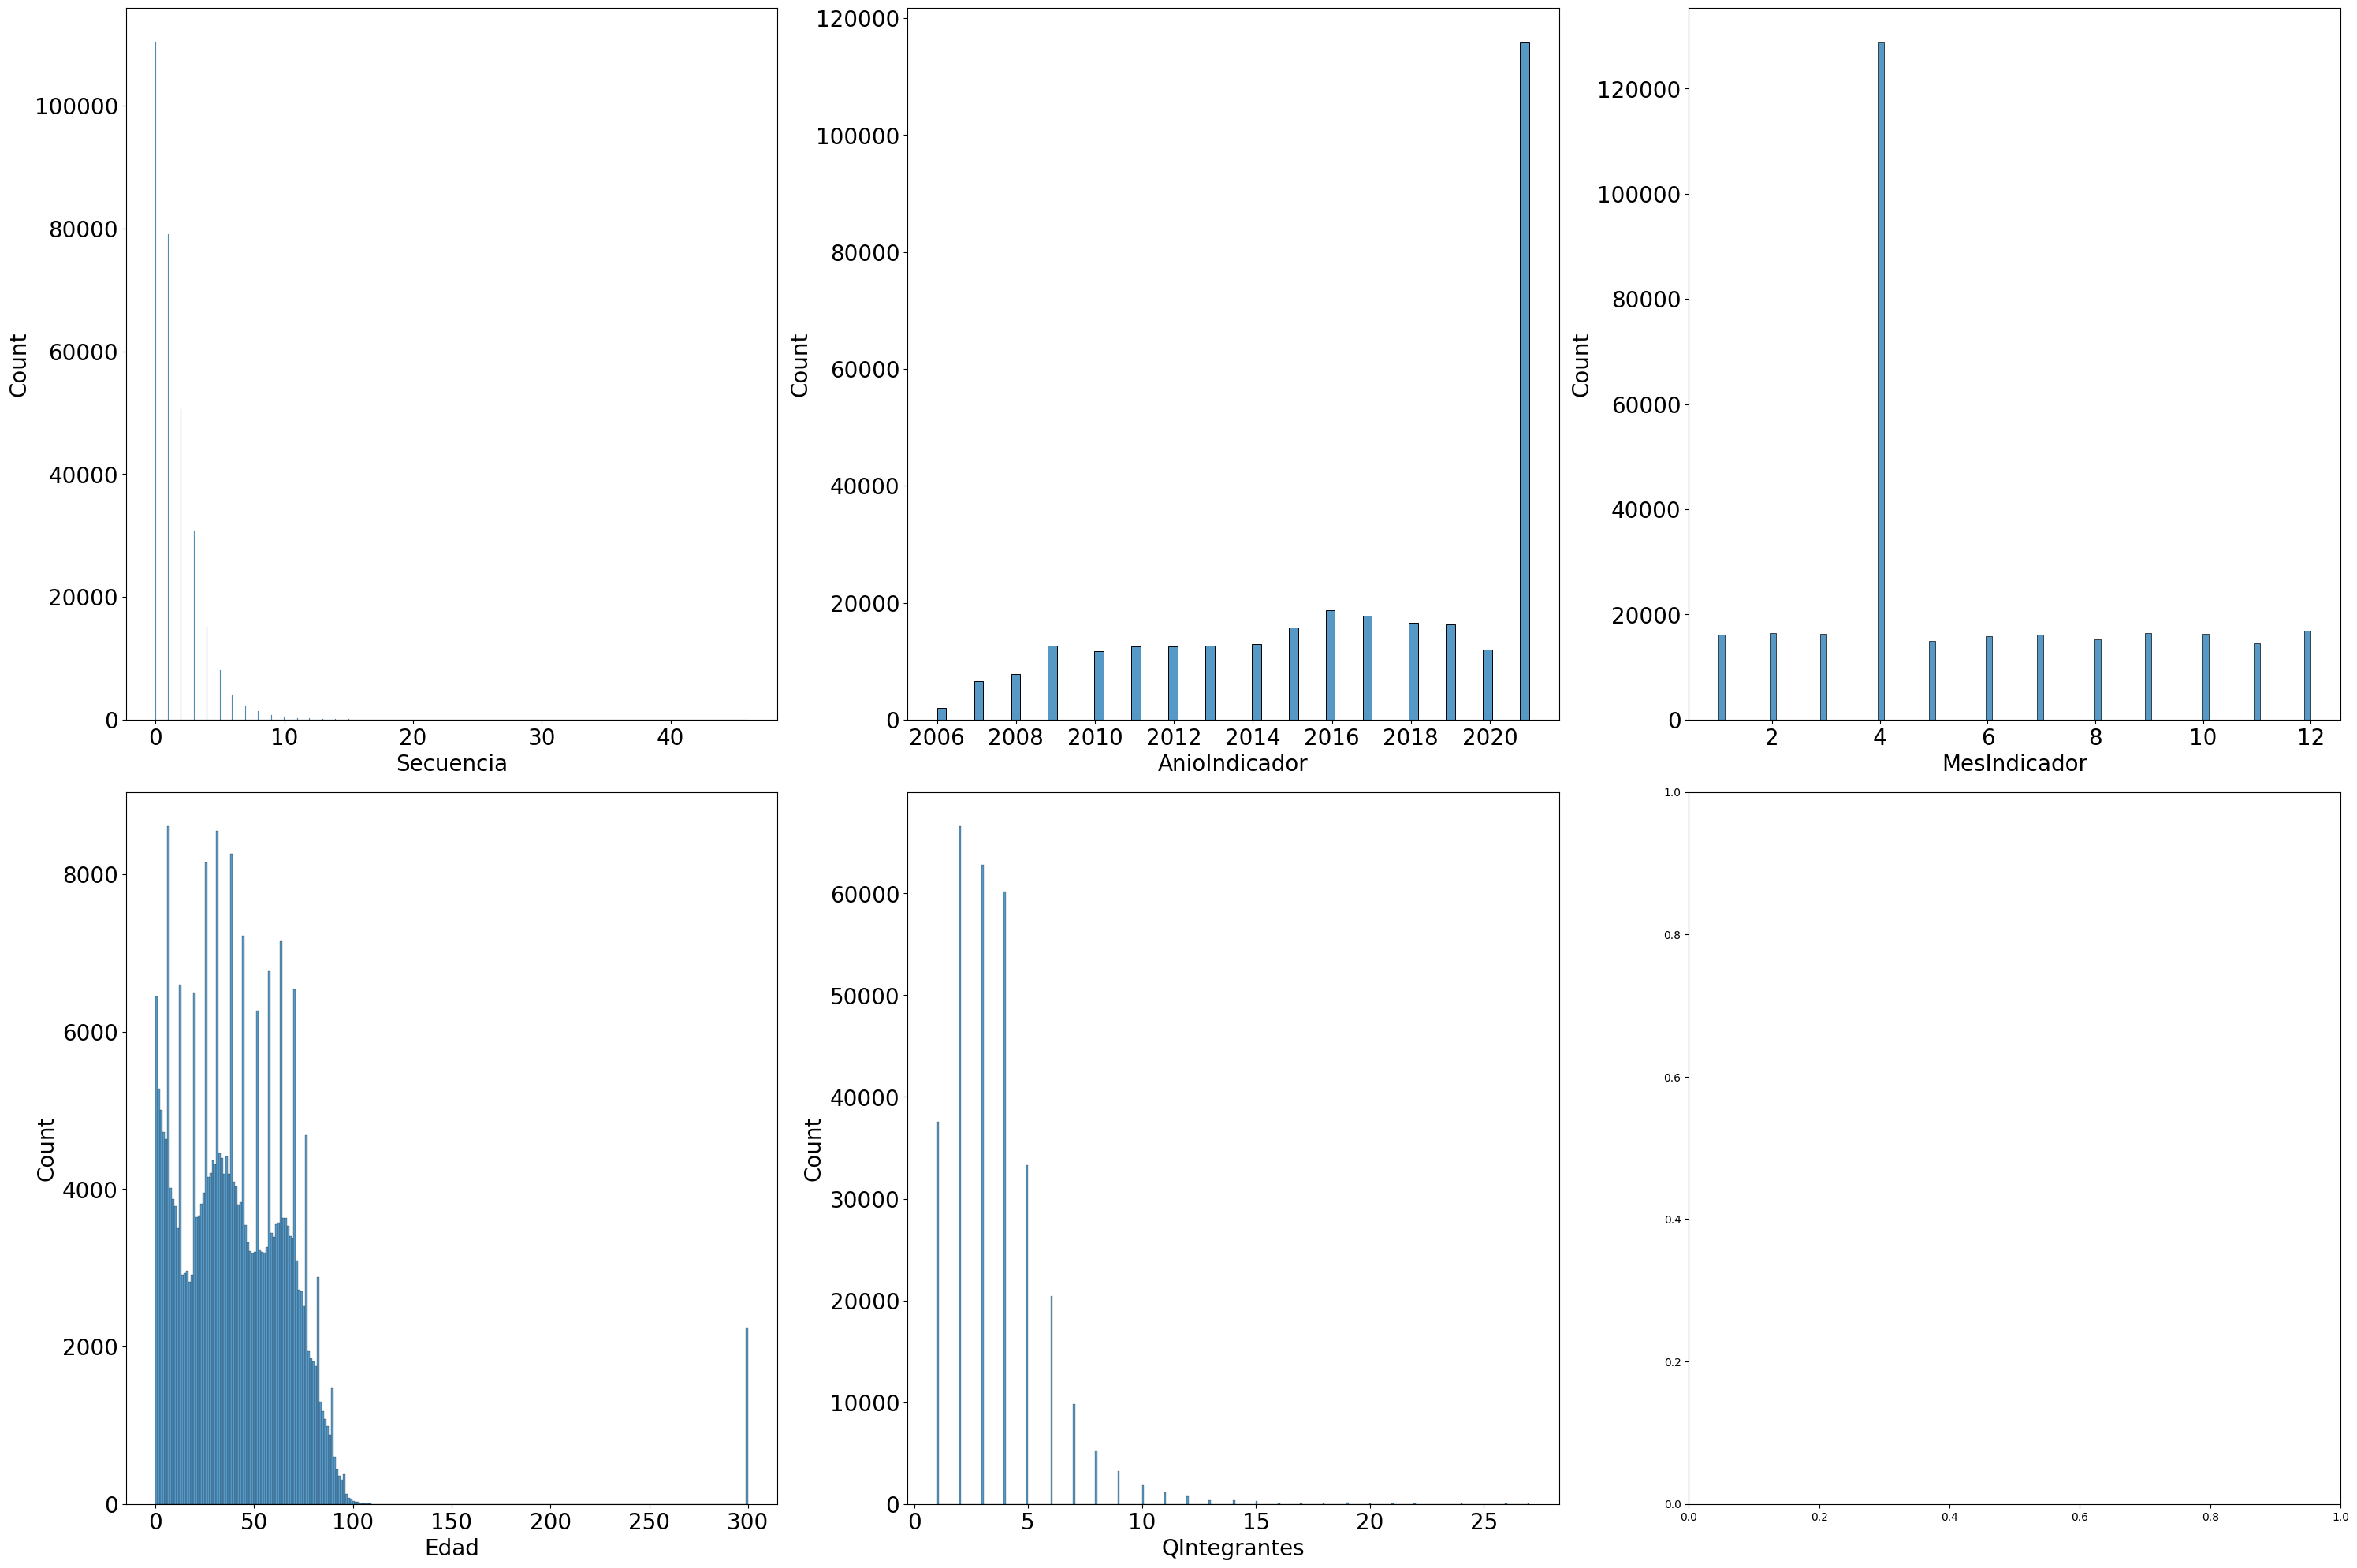

In [26]:
numeric_features_func(num_cols[0:5], df, 3)

c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constru

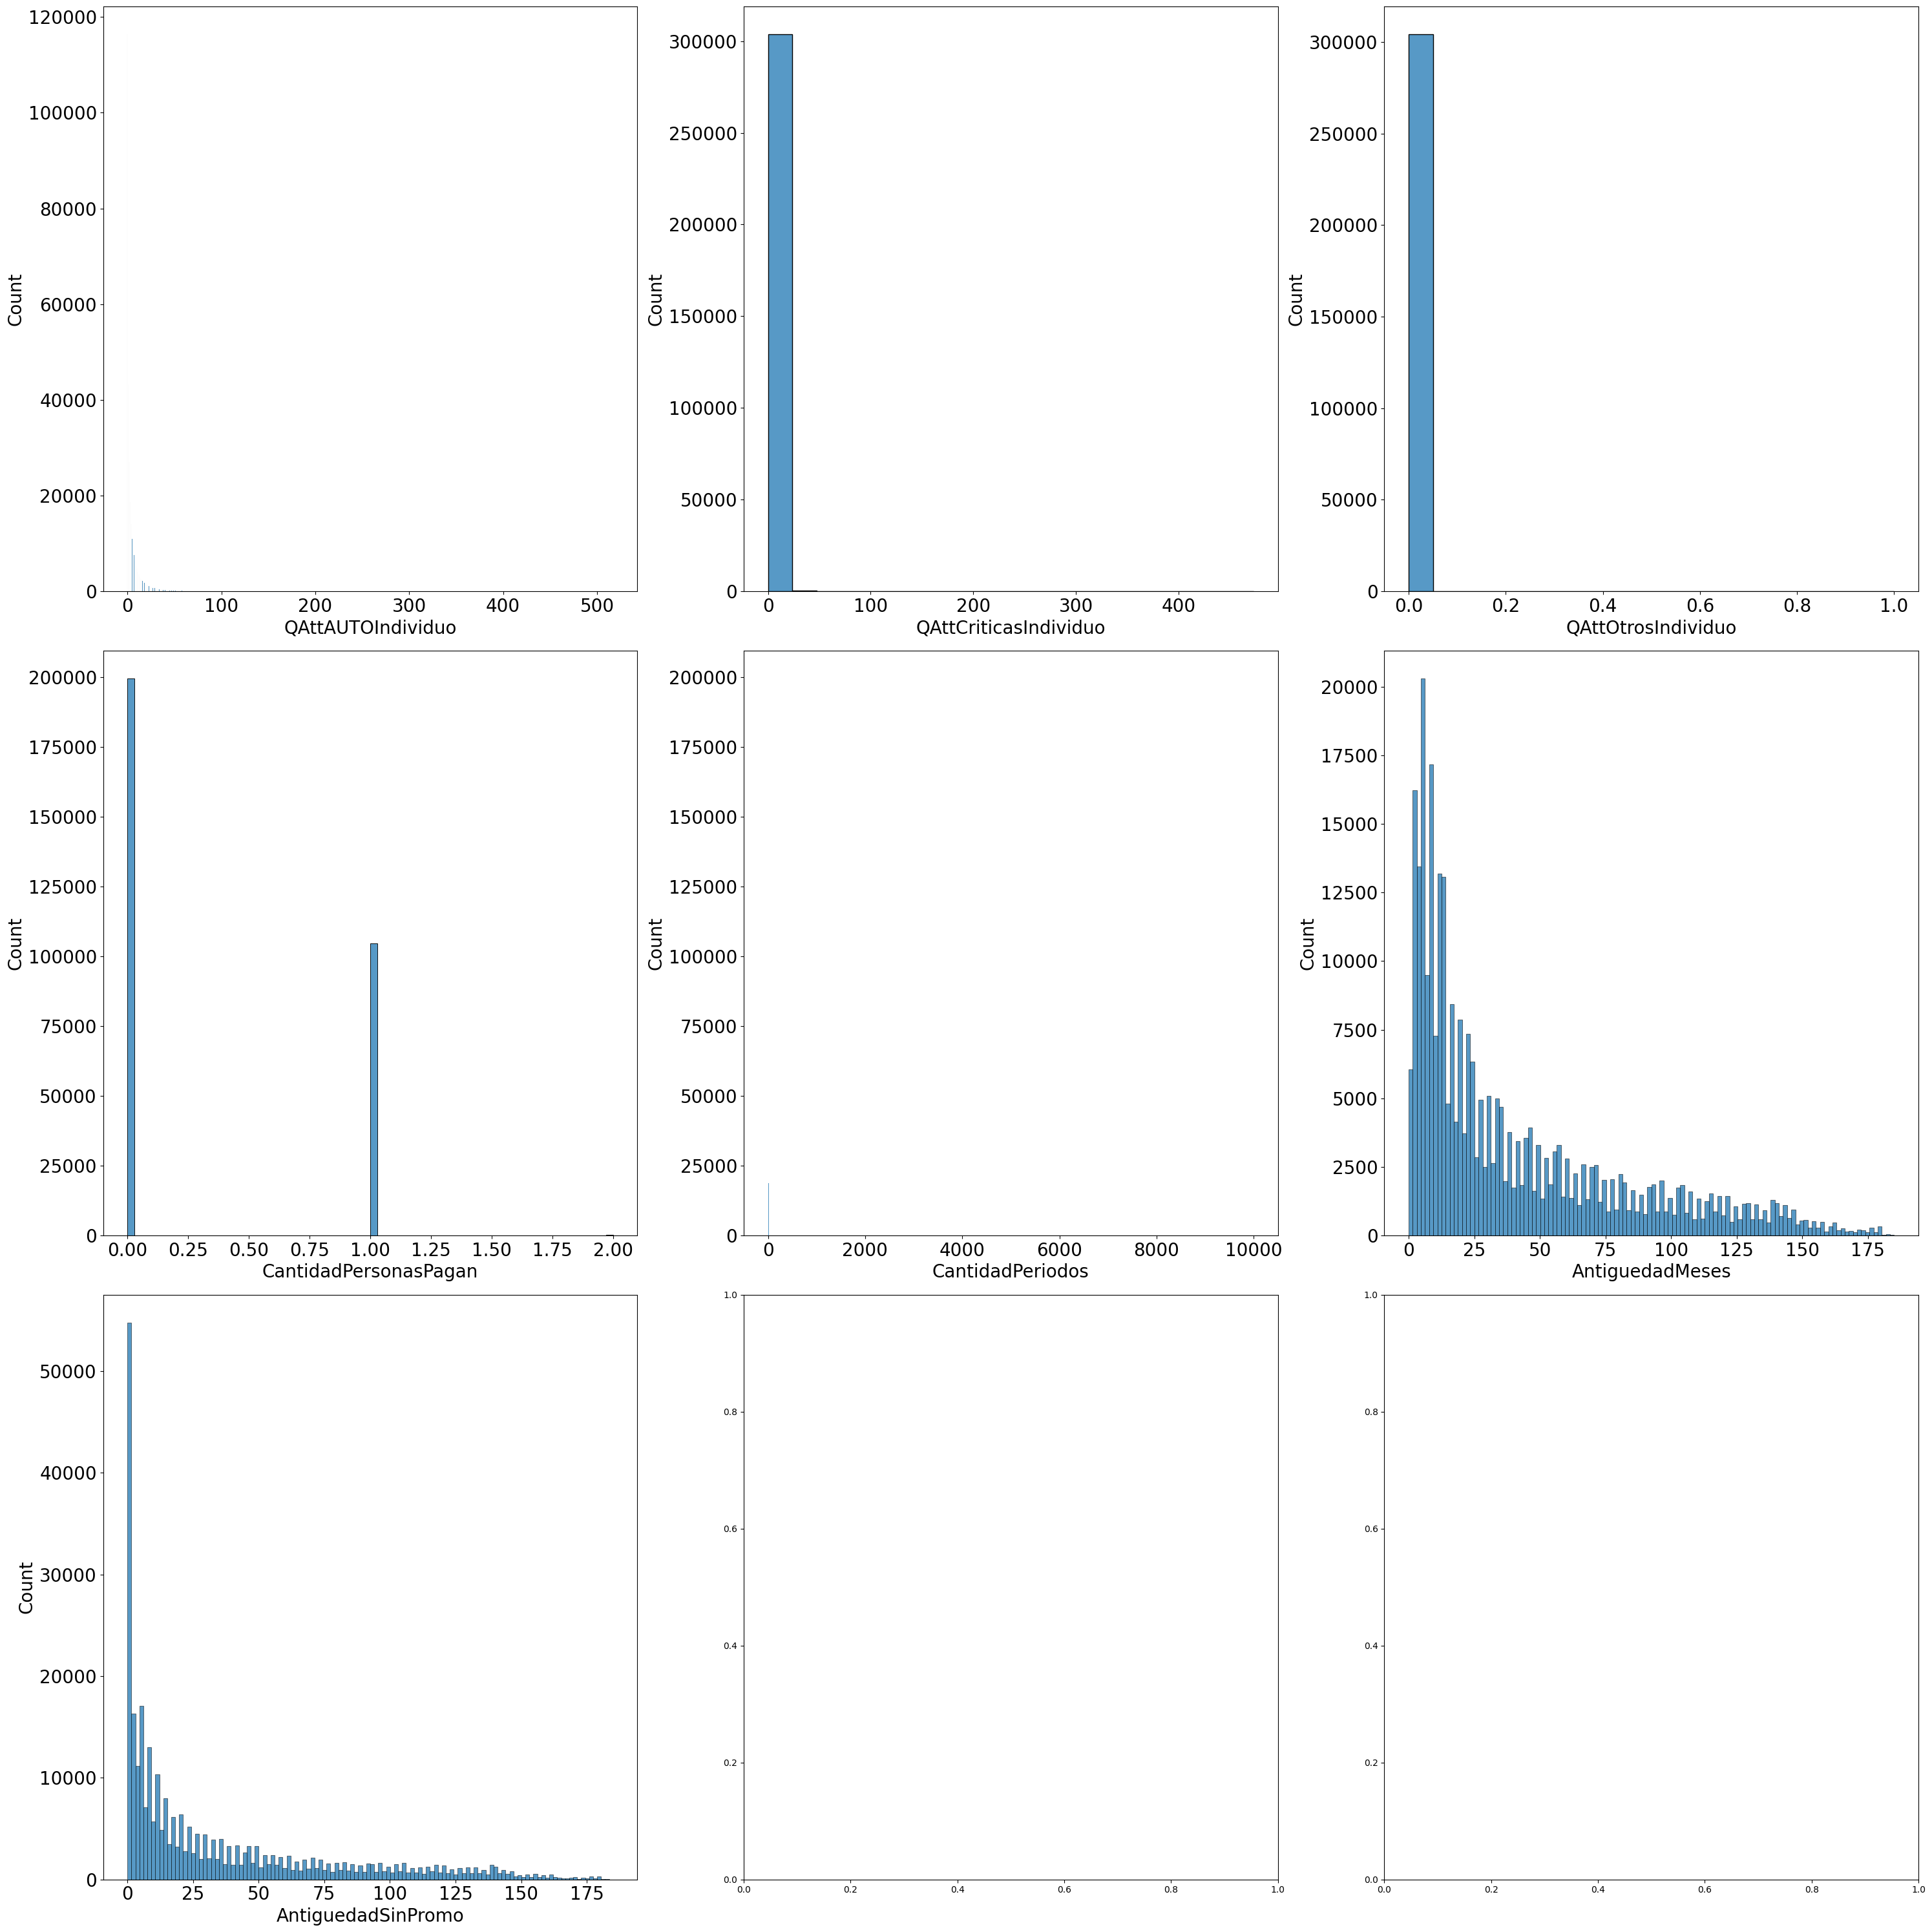

In [27]:
numeric_features_func(num_cols[5:], df, 3)

In [28]:
#Visualización bivariada de características numéricas
#relación entre cada variable numérica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def numeric_features_func(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    



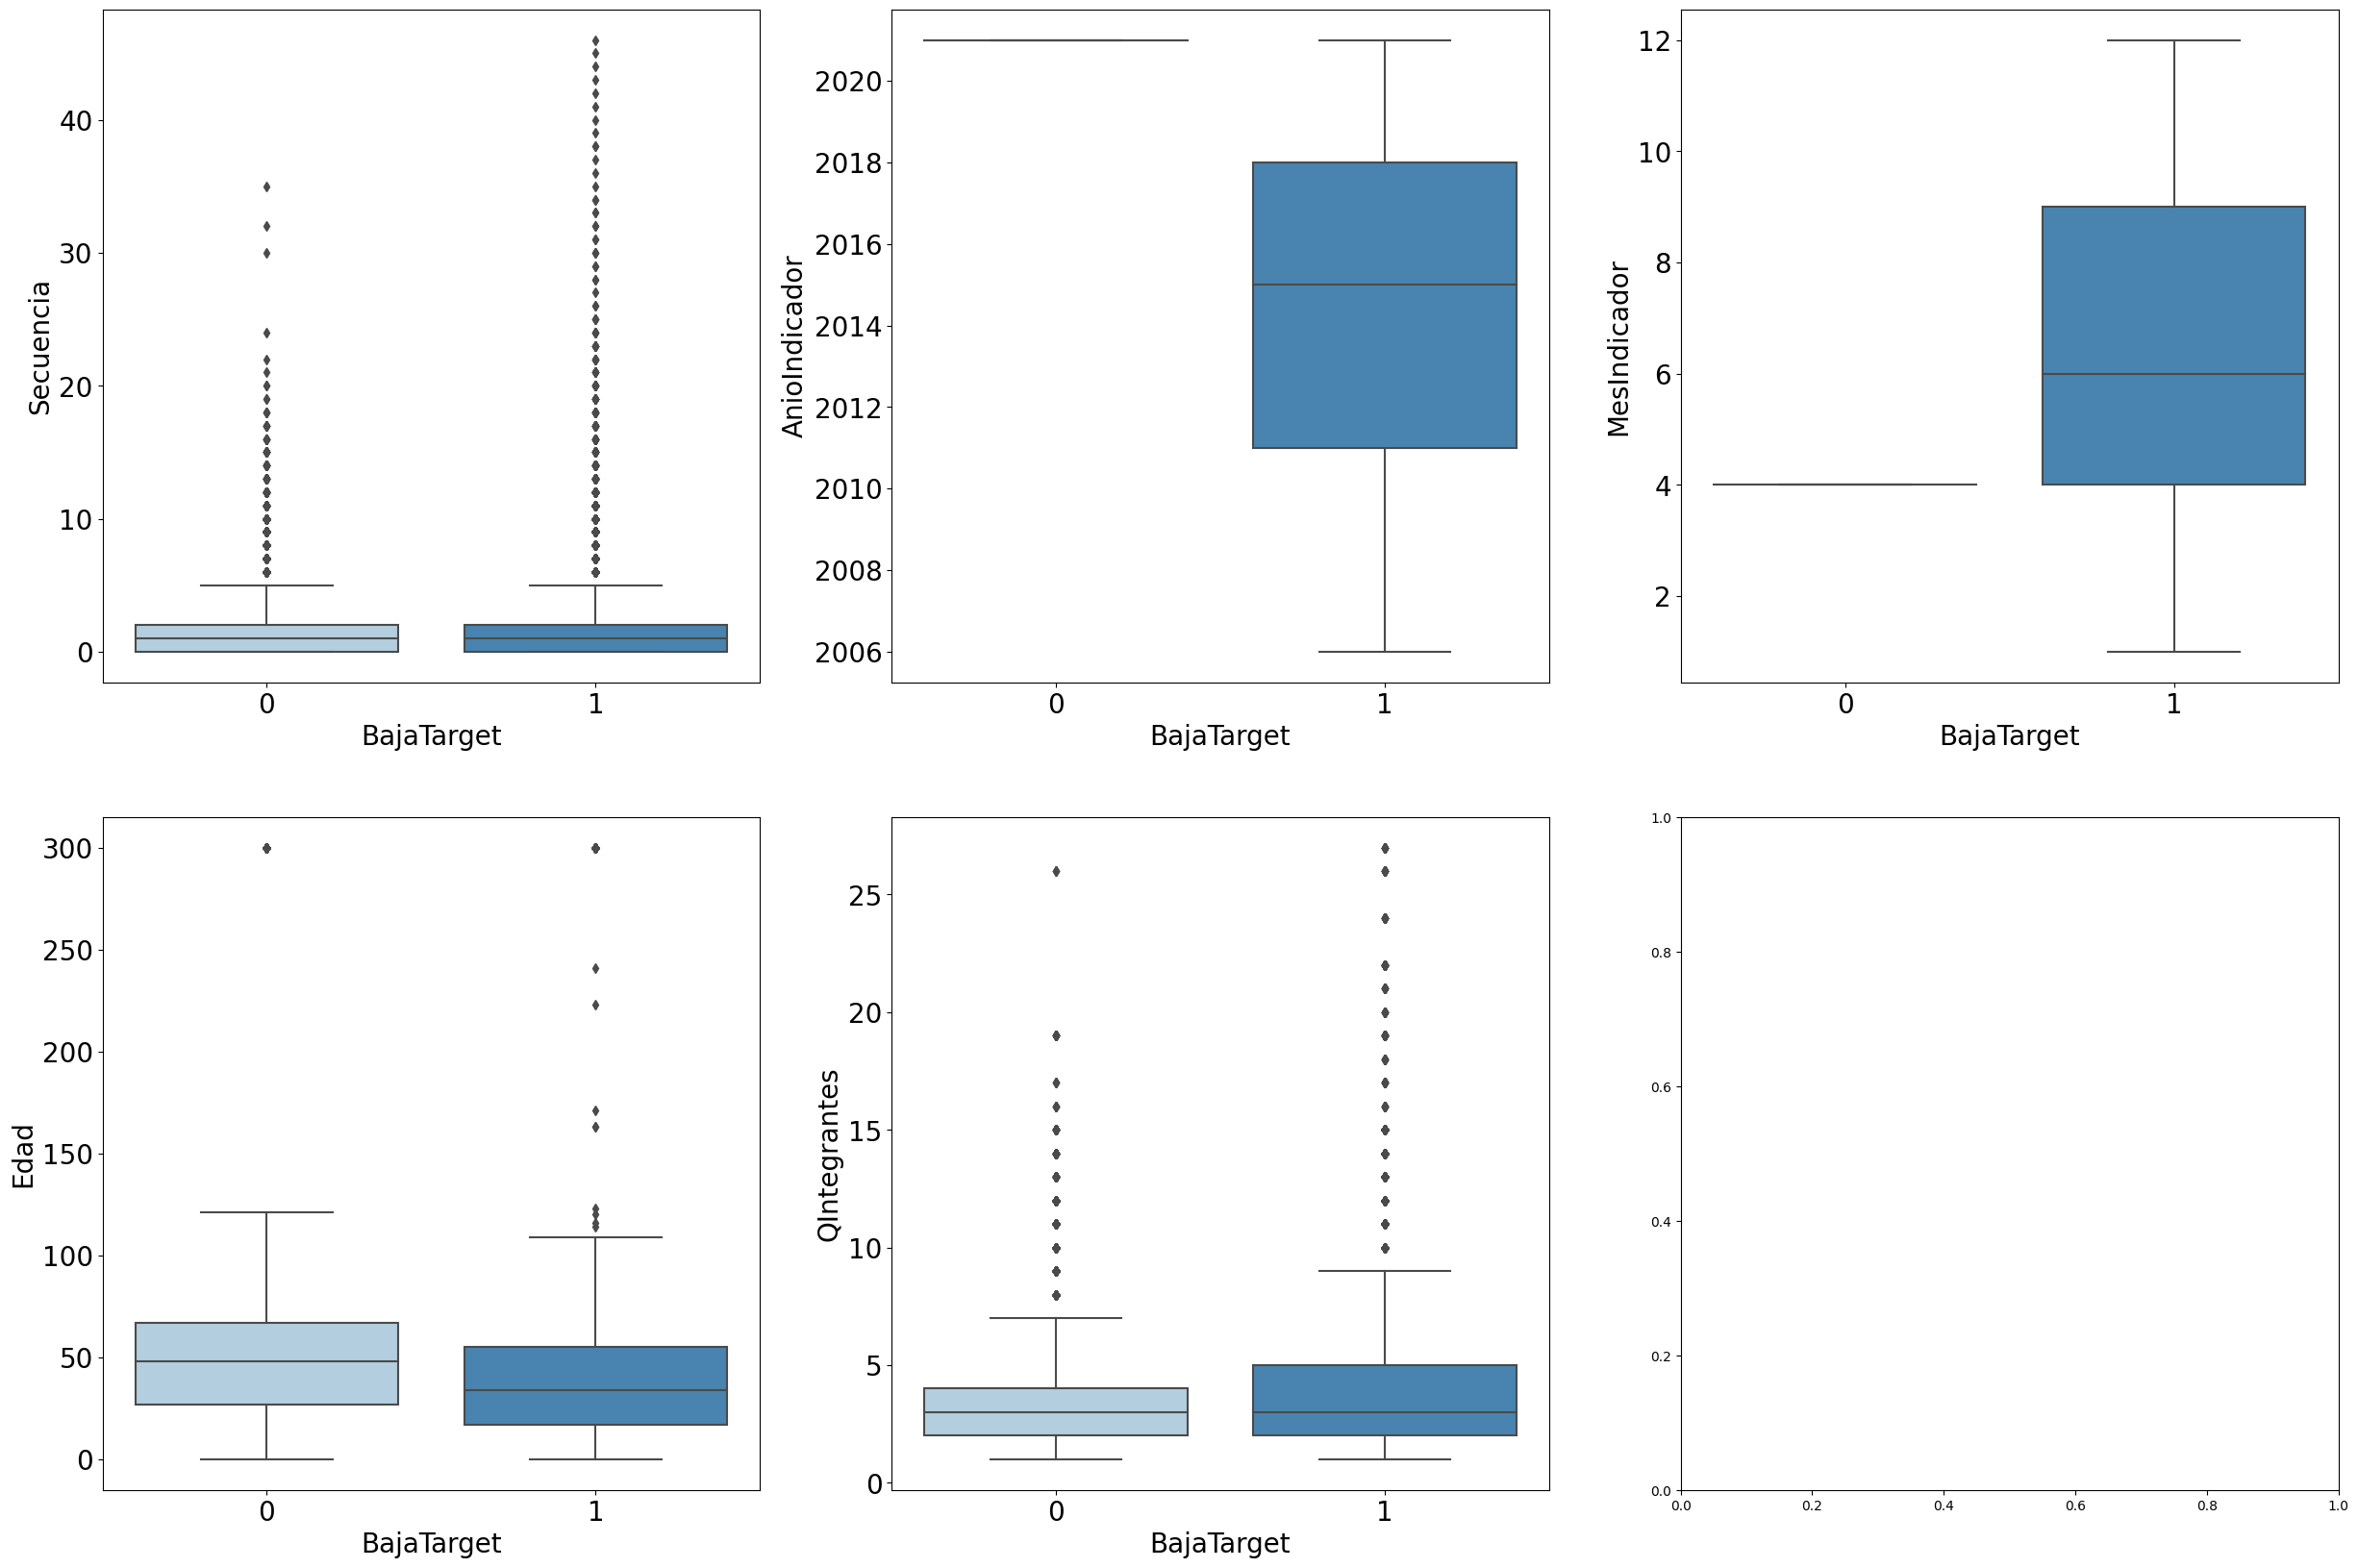

In [29]:
numeric_features_func(num_cols[0:5], 'BajaTarget' , df, 3)

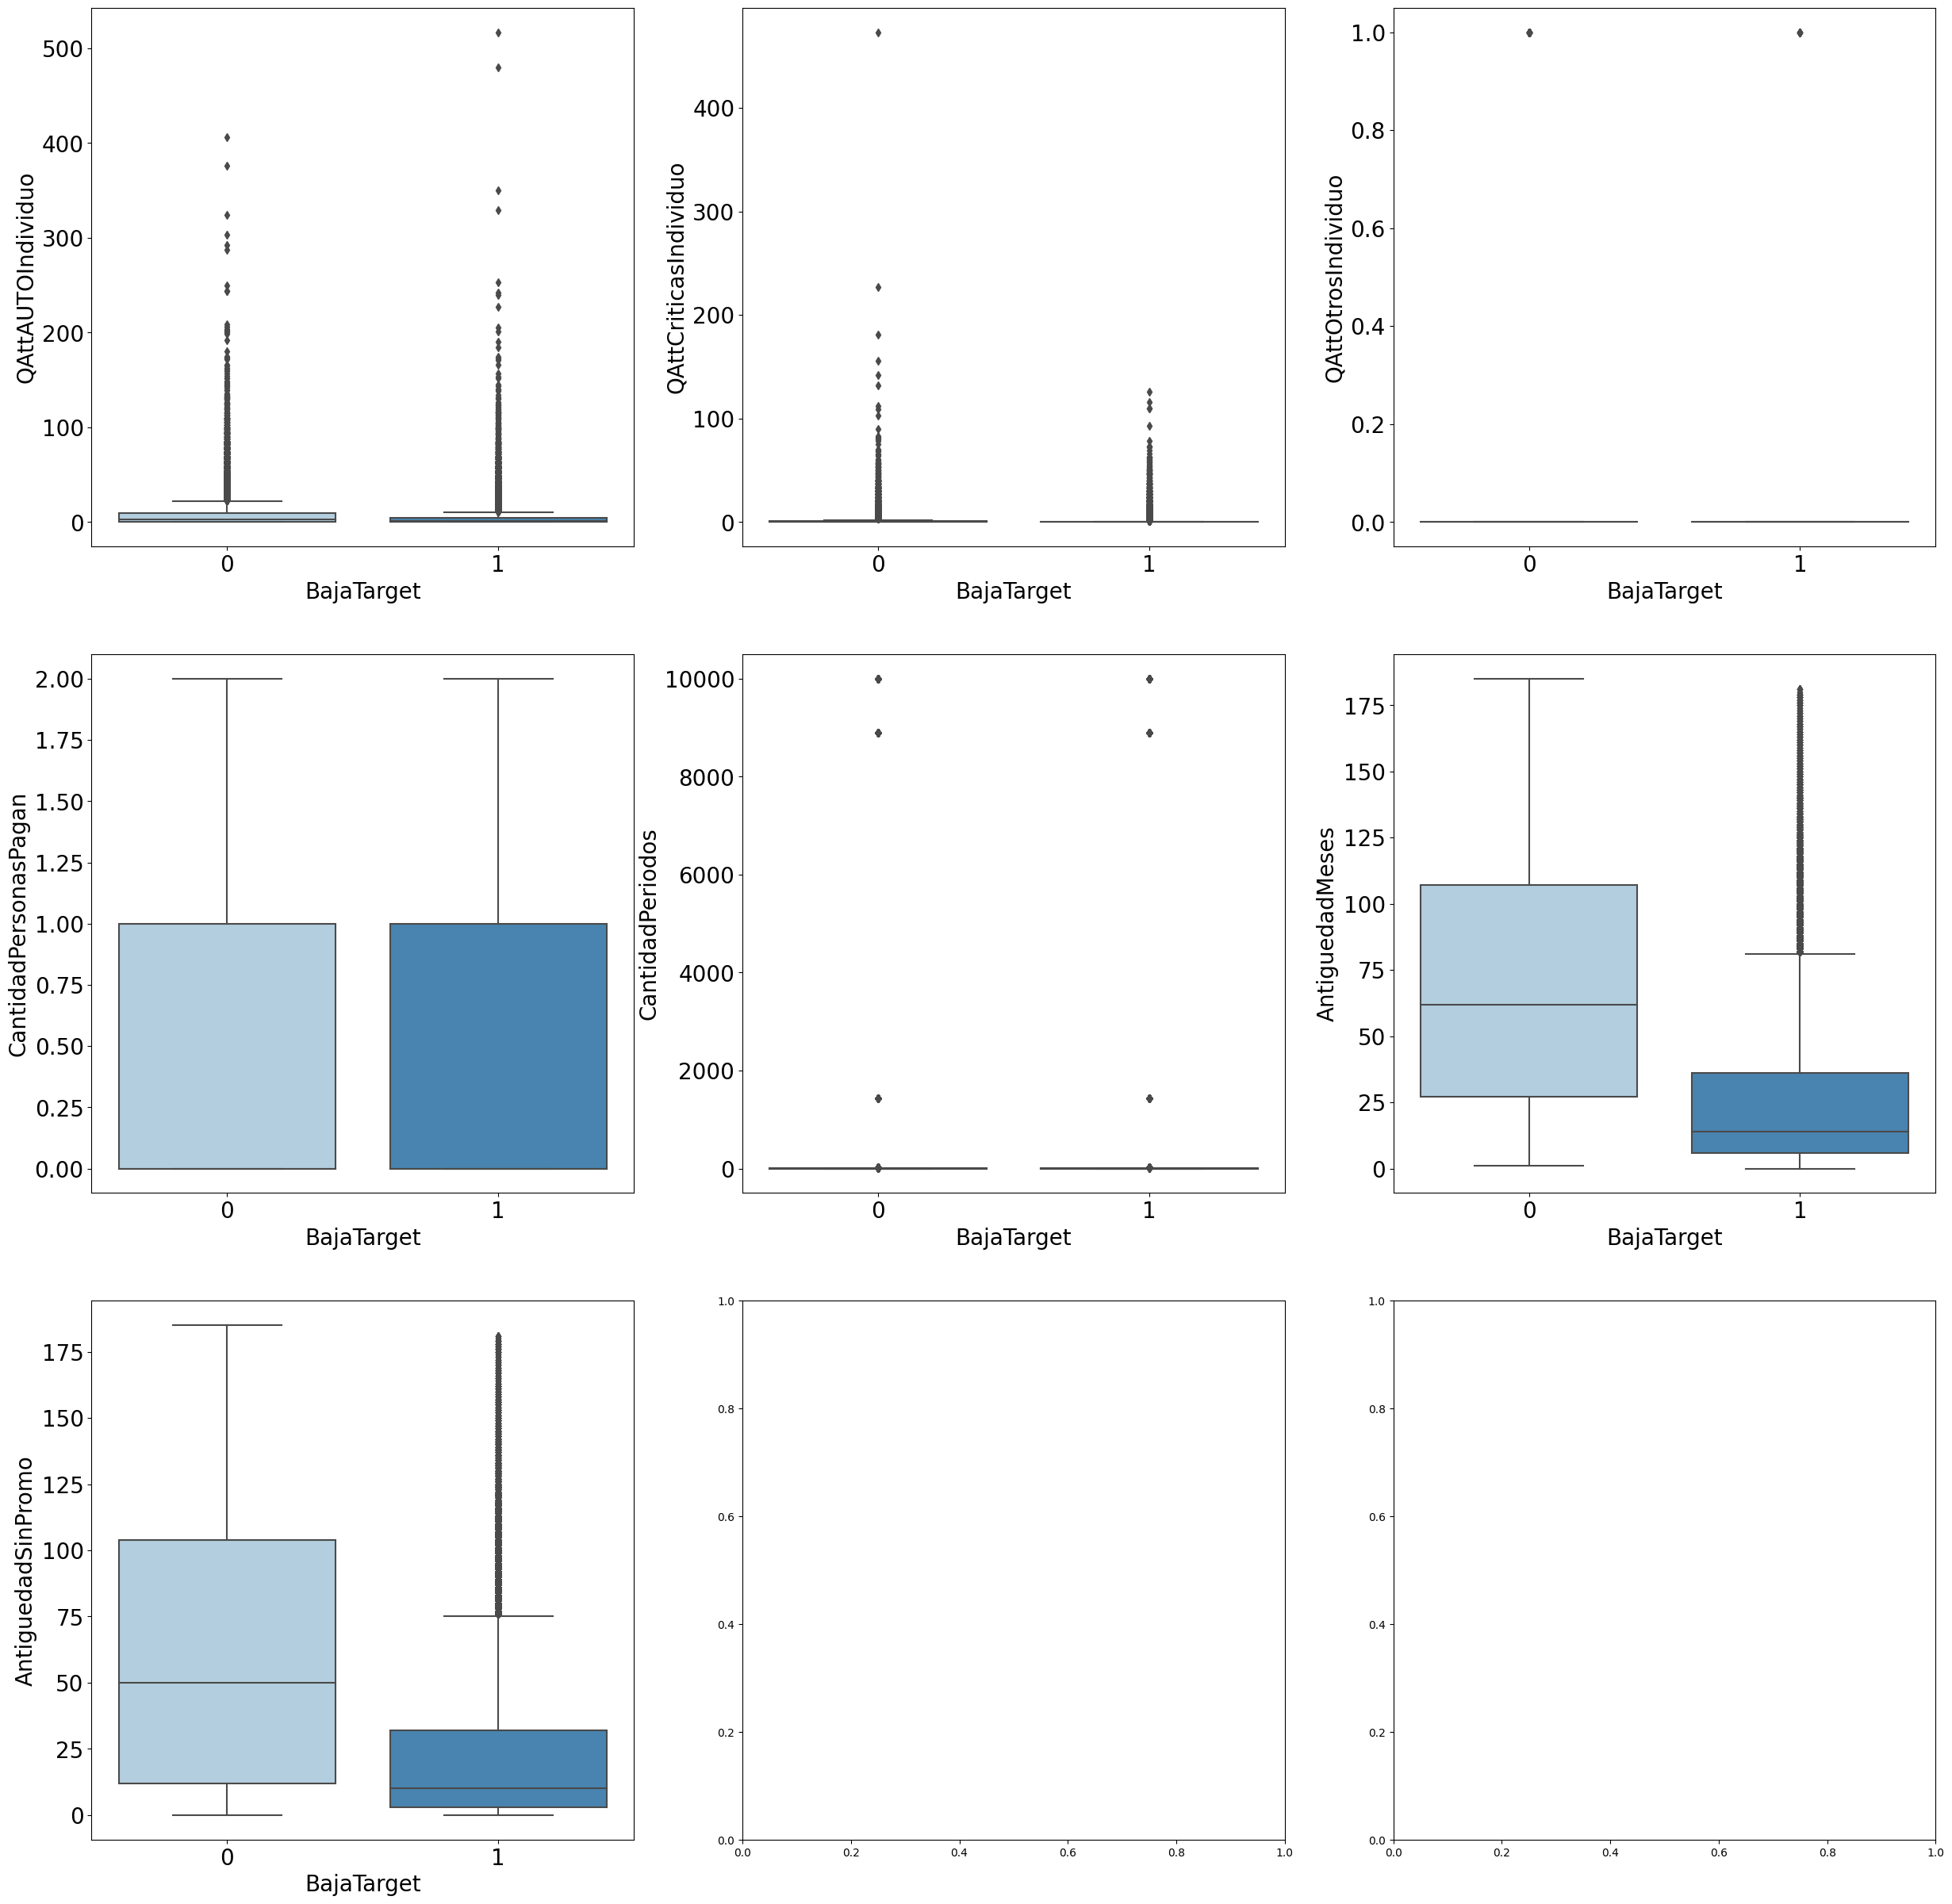

In [30]:
numeric_features_func(num_cols[5:], 'BajaTarget' , df, 3)

In [55]:
df['Edad'] = np.where(df['Edad']>100,math.ceil(df['Edad'].mean()),df['Edad'])

In [56]:
df['CantidadPeriodos'] = np.where(df['CantidadPeriodos']>100,math.ceil(df['CantidadPeriodos'].median()),df['CantidadPeriodos'])

In [57]:
df['CantidadPeriodos'].unique()

array([0.0, 12.0, 9.0, 6.0, 4.0, 1.0, 3.0, 2.0, 5.0, 24.0, 18.0, 8.0,
       15.0], dtype=object)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Secuencia,304337.0,1.485304,1.828241,0.0,0.0,1.0,2.0,46.0
AnioIndicador,304337.0,2016.773928,4.476828,2006.0,2013.0,2018.0,2021.0,2021.0
MesIndicador,304337.0,5.563809,3.002197,1.0,4.0,4.0,8.0,12.0
QIntegrantes,304337.0,3.587273,2.130944,1.0,2.0,3.0,5.0,27.0
QAttAUTOIndividuo,304337.0,4.767422,9.564825,0.0,0.0,1.0,5.0,517.0
QAttCriticasIndividuo,304337.0,0.70141,2.753228,0.0,0.0,0.0,0.0,473.0
QAttOtrosIndividuo,304337.0,0.000273,0.016512,0.0,0.0,0.0,0.0,1.0
CantidadPersonasPagan,304337.0,0.344963,0.47642,0.0,0.0,0.0,1.0,2.0
AntiguedadMeses,304337.0,40.684048,41.390259,0.0,9.0,23.0,62.0,185.0
AntiguedadSinPromo,304337.0,35.579098,42.242089,0.0,4.0,17.0,55.0,185.0


In [88]:
y = df['BajaTarget']
df=df.drop(columns=['BajaTarget'])
df.head()

,Secuencia,CodigoDeSucursal,AnioIndicador,MesIndicador,TipoAfiliacion,DescripcionDeSexo,EstadoMesIndicadores,Convenio,DescripcionDeTipoDePago,DescripcionDeInstitucionDeCobro,...,ISinExpCriticas,GSoloAttBanales,GSoloAttCr_ticas,GSinAtenciones,GConAttAutoyCriticas,GSinExpAuto,GSinExpCriticas,AntiguedadMeses,AntiguedadSinPromo,EstadoMora
0,1.0,2,2021.0,4.0,Voluntario,Femenino,Activo,238,Convenio,14,...,N,N,N,N,S,N,N,127.0,127.0,Activo
1,1.0,2,2021.0,4.0,Voluntario,Masculino,Activo,249,Convenio,14,...,N,N,S,N,N,S,N,36.0,36.0,Activo
2,1.0,2,2009.0,9.0,Voluntario,Masculino,Suspendido,238,Convenio,14,...,S,S,N,N,N,N,S,14.0,14.0,Suspendido
3,0.0,2,2009.0,1.0,Individual,Femenino,Suspendido,239,Débito tarjeta,34,...,S,N,N,S,N,S,S,6.0,0.0,Suspendido
4,0.0,1,2021.0,4.0,Voluntario,Femenino,Activo,11,Convenio,14,...,S,N,N,N,S,N,N,127.0,127.0,Activo


In [89]:
y

0         0
1         0
2         1
3         1
4         0
         ..
304332    1
304333    1
304334    1
304335    1
304336    1
Name: BajaTarget, Length: 304337, dtype: object

In [90]:
### Hacer todas las transaformaciones necesarias juntas con ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las columnas cualitativas
# Para mantener las columnas a las que no se les aplica ninguna transformación se tiene que indicar remainder='passthrough'.
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

label_cols = df[['Convenio', 'DescripcionDeInstitucionDeCobro']].columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns


sublist=[x for x in cat_cols if x not in label_cols]
cat_cols=df[sublist].columns



preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), num_cols),
                    ('onehot', OneHotEncoder(drop='first'), cat_cols)
                    ],
                    remainder='passthrough')

In [63]:
le=LabelEncoder()
df['Convenio']=le.fit_transform(df['Convenio'])
df['DescripcionDeInstitucionDeCobro']=le.fit_transform(df['DescripcionDeInstitucionDeCobro'])


In [91]:
data_prep = preprocessor.fit_transform(df.drop(columns=['DescripcionDeInstitucionDeCobro', 'Convenio']))
data_prep=data_prep.toarray() 

In [92]:
data_prep.shape

(304337, 150)

In [93]:
# Convertir el output en dataframe y añadir el nombre de las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, encoded_cat])

data = pd.DataFrame(data_prep, columns=labels)

data.head()

,Secuencia,AnioIndicador,MesIndicador,QIntegrantes,QAttAUTOIndividuo,QAttCriticasIndividuo,QAttOtrosIndividuo,CantidadPersonasPagan,AntiguedadMeses,AntiguedadSinPromo,...,ISinExpAuto_S,ISinExpCriticas_S,GSoloAttBanales_S,GSoloAttCr_ticas_S,GSinAtenciones_S,GConAttAutoyCriticas_S,GSinExpAuto_S,GSinExpCriticas_S,EstadoMora_Campaña,EstadoMora_Suspendido
0,-0.265449,0.943990,-0.520889,-0.744870,0.547066,0.471662,-0.016517,-0.724074,2.085420,2.164217,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.265449,0.943990,-0.520889,-0.275593,-0.498434,0.108451,-0.016517,-0.724074,-0.113168,0.009964,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.265449,-1.736484,1.144561,0.193683,-0.498434,-0.254760,-0.016517,-0.724074,-0.644695,-0.510844,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.812424,-1.736484,-1.520159,-0.744870,-0.498434,-0.254760,-0.016517,1.374916,-0.837977,-0.842268,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,-0.812424,0.943990,-0.520889,-0.275593,-0.289334,-0.254760,-0.016517,-0.724074,2.085420,2.164217,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [94]:
df[['DescripcionDeInstitucionDeCobro', 'Convenio']]

,DescripcionDeInstitucionDeCobro,Convenio
0,14,238
1,14,249
2,14,238
3,34,239
4,14,11
...,...,...
304332,14,226
304333,14,249
304334,14,99
304335,34,239


In [95]:
data = pd.concat([data,df[['DescripcionDeInstitucionDeCobro', 'Convenio']]],axis=1)

In [96]:
data.head()

,Secuencia,AnioIndicador,MesIndicador,QIntegrantes,QAttAUTOIndividuo,QAttCriticasIndividuo,QAttOtrosIndividuo,CantidadPersonasPagan,AntiguedadMeses,AntiguedadSinPromo,...,GSoloAttBanales_S,GSoloAttCr_ticas_S,GSinAtenciones_S,GConAttAutoyCriticas_S,GSinExpAuto_S,GSinExpCriticas_S,EstadoMora_Campaña,EstadoMora_Suspendido,DescripcionDeInstitucionDeCobro,Convenio
0,-0.265449,0.943990,-0.520889,-0.744870,0.547066,0.471662,-0.016517,-0.724074,2.085420,2.164217,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14,238
1,-0.265449,0.943990,-0.520889,-0.275593,-0.498434,0.108451,-0.016517,-0.724074,-0.113168,0.009964,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,14,249
2,-0.265449,-1.736484,1.144561,0.193683,-0.498434,-0.254760,-0.016517,-0.724074,-0.644695,-0.510844,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,14,238
3,-0.812424,-1.736484,-1.520159,-0.744870,-0.498434,-0.254760,-0.016517,1.374916,-0.837977,-0.842268,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,34,239
4,-0.812424,0.943990,-0.520889,-0.275593,-0.289334,-0.254760,-0.016517,-0.724074,2.085420,2.164217,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14,11


In [97]:
from sklearn.decomposition import PCA
#PCA
pca=PCA(n_components=2) 
X_pca=pca.fit_transform(data) 

In [98]:
X_pca

array([[-45.02922051,   8.71034156],
       [-56.0250317 ,   9.24050745],
       [-45.04907223,   8.63657937],
       ...,
       [ 93.76925979,   1.47322904],
       [-47.06516076, -11.23315569],
       [-46.61432239,  -2.27677106]])

In [99]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
[0.98497667 0.99750798]


In [100]:
##Visualizar los eigenvectors
pd.DataFrame(
    data    = pca.components_,
    columns = data.columns,
    index=['PC1', 'PC2']
)

,Secuencia,AnioIndicador,MesIndicador,QIntegrantes,QAttAUTOIndividuo,QAttCriticasIndividuo,QAttOtrosIndividuo,CantidadPersonasPagan,AntiguedadMeses,AntiguedadSinPromo,...,GSoloAttBanales_S,GSoloAttCr_ticas_S,GSinAtenciones_S,GConAttAutoyCriticas_S,GSinExpAuto_S,GSinExpCriticas_S,EstadoMora_Campaña,EstadoMora_Suspendido,DescripcionDeInstitucionDeCobro,Convenio
PC1,0.000739,0.001295,-0.000693,-0.000005,0.000443,0.000129,-0.000002,-0.004176,0.001916,0.002770,...,-0.000047,-0.000008,0.000128,-0.000073,0.000120,0.000081,-0.000070,-0.000862,-0.051391,-0.998645
PC2,0.005826,0.013473,-0.002360,0.006576,0.003832,-0.001561,0.000283,-0.027021,0.005390,0.011699,...,0.001350,-0.000200,-0.000216,-0.000935,-0.000416,0.001134,0.000365,0.002866,-0.996668,0.051668


In [101]:
## Datset final con las CP calculadas
X_pca_df=pd.DataFrame(X_pca,columns=['CP1', 'CP2'])

In [106]:
data["BajaTarget"]=y

data.reset_index(inplace=True)
data_final=pd.concat([data,X_pca_df],axis=1)

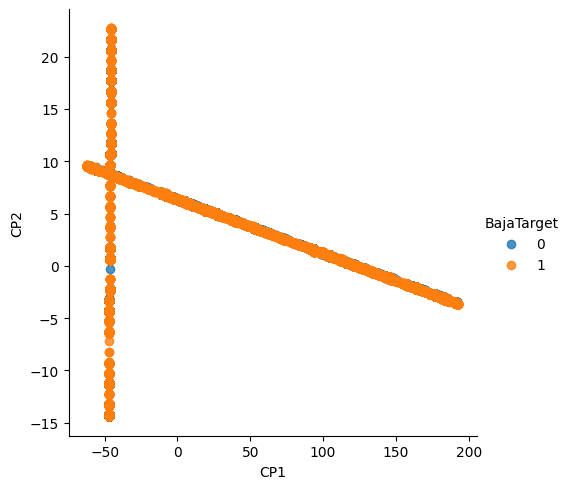

In [108]:
#Grafico
sns.lmplot( x="CP1", y="CP2", data=data_final, hue='BajaTarget',fit_reg=False)